김인유
1. 남자, 여자 중에 누구 더 확진률이 높은지
2. 어떤 코로나 경로로 확진이 많이 되는지
 - 전체 데이터
 - 남, 여 따로
 
7.Policy.csv  
1) region 이랑 연관해서 보기
   유딩 ~ 대딩까지는 policy때문에 많은 관련이 없을 것이라 생각해서 넘어갔다.

2) 입국자수 감소의 원인과 정책 연관성
   patientInfo.csv 에서 왜 해외유입으로 전염이 많이 되었을까? 연관성 보기
   => 채은님.. 이거 어떻게 하는지 모르겠어, 확진 경로 남여 따로 한 데이터도 추가했어요... 지송해요...
   
   
csv 파일에 자치구별로 적을게 없다.

1.patientinfo.csv
* 서울에서 왜 여자 확진자가 많을까  
교회 남녀 비율 : http://www.kehcnews.co.kr/news/articleView.html?idxno=30700   
간호사 남녀 비율 : http://www.thejobnews.kr/news/articleView.html?idxno=4075  
  
* oversea inflow가 왜 더 많았는지, 입국자수랑 연관이 있는지, 어떤 정책policy과 관련이 있는지  
  
* 인구수 데이터 -> 확진수(명)/인구수*100 (%)  
여자 확진자 많은데, 비율로도 그럴까? 

2. region
* 요양원이 많은면 확진자도 많을까? 연관있나  
  노인 비율이 높으면 확진자가 많을까?  
  유딩 ~ 대딩까지는 policy때문에 많은 관련이 없을 것이라 생각해서 넘어갔다   
  자치구별 학원 개수 데이터 구해서 확진자 수와 관련있나 확인해보기
  
3. case 는 나중에  
  
4. seoulfloating  
  자치구당 유동인구수, 25개구 유동인구와 확진자와 관계 jan 23~ jun 30  

5. weather 
  월별 평균 기온 그래프와 확진자 월별 그래프 꺾은선으로 비교  
  월별 최대 풍속과 확진자 비교 그래프 :  http://scimonitors.com/%EC%BD%94%EB%A1%9C%EB%82%98-%EB%B9%84%EB%A7%90-%EB%B0%94%EB%9E%8C%EB%B6%88%EB%A9%B4-%EA%B3%B5%EA%B8%B0%EC%A4%91-6%EB%AF%B8%ED%84%B0-%EC%A0%84%ED%8C%8C/  
  월별 강수량과 확진자 비교 그래프  

6. searchTrend   
  넘어감  

7. policy  
  region이랑 연관해서 보기  
  입국자수 감소의 원인과 정책 연관성   
  
8. time  
  test가 많은날 대유행이랑 연관지어보기   
  
9. 



In [17]:
import csv
import pandas as pd
import os
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

data_path = os.getenv('HOME') + '/aiffel/covid/'

# 1. PatientInfo.csv

In [18]:
patientInfo = pd.read_csv(data_path + "PatientInfo.csv")

patientInfo_korea = patientInfo[patientInfo['country']== 'Korea']   # 한국사람중에서
patientInfo_seoul = patientInfo[patientInfo['province'] == 'Seoul']    # 서울 데이터만 뽑아오기

print("전국 데이터 개수 :", len(patientInfo))
print("서울 데이터 개수 :", len(patientInfo_seoul))

patientInfo_seoul.head(5)

전국 데이터 개수 : 5165
서울 데이터 개수 : 1312


patient_id     sex  age country province         city  \
0  1000000001    male  50s   Korea    Seoul   Gangseo-gu   
1  1000000002    male  30s   Korea    Seoul  Jungnang-gu   
2  1000000003    male  50s   Korea    Seoul    Jongno-gu   
3  1000000004    male  20s   Korea    Seoul      Mapo-gu   
4  1000000005  female  20s   Korea    Seoul  Seongbuk-gu   

         infection_case infected_by contact_number symptom_onset_date  \
0       overseas inflow         NaN             75         2020-01-22   
1       overseas inflow         NaN             31                NaN   
2  contact with patient  2002000001             17                NaN   
3       overseas inflow         NaN              9         2020-01-26   
4  contact with patient  1000000002              2                NaN   

  confirmed_date released_date deceased_date     state  
0     2020-01-23    2020-02-05           NaN  released  
1     2020-01-30    2020-03-02           NaN  released  
2     2020-01-30    2020-02-19           NaN  released  
3     2020-01-30    2020-02-15           NaN  released  
4     2020-01-31    2020-02-24           NaN  released

In [41]:
patientInfo_other= patientInfo_korea[patientInfo_korea['province'] != 'Seoul']
patientInfo_other

patient_id     sex  age country province         city  \
1312  1100000001    male  10s   Korea    Busan   Dongnae-gu   
1313  1100000002  female  50s   Korea    Busan  Haeundae-gu   
1314  1100000003  female  20s   Korea    Busan  Haeundae-gu   
1315  1100000004  female  20s   Korea    Busan  Haeundae-gu   
1316  1100000005  female  20s   Korea    Busan  Haeundae-gu   
...          ...     ...  ...     ...      ...          ...   
5156  7000000011    male  30s   Korea  Jeju-do      Jeju-do   
5157  7000000012  female  20s   Korea  Jeju-do      Jeju-do   
5159  7000000014  female  30s   Korea  Jeju-do      Jeju-do   
5160  7000000015  female  30s   Korea  Jeju-do      Jeju-do   
5161  7000000016     NaN  NaN   Korea  Jeju-do      Jeju-do   

            infection_case infected_by contact_number symptom_onset_date  \
1312         Onchun Church         NaN           1091                NaN   
1313  contact with patient         NaN            131                NaN   
1314                   etc         NaN             16         2020-02-21   
1315    Shincheonji Church         NaN              8                NaN   
1316  contact with patient         NaN             14                NaN   
...                    ...         ...            ...                ...   
5156  contact with patient  7000000009              5                NaN   
5157       overseas inflow         NaN              9                NaN   
5159         Itaewon Clubs         NaN            140                NaN   
5160       overseas inflow         NaN             25                NaN   
5161       overseas inflow         NaN            NaN                NaN   

     confirmed_date released_date deceased_date     state  
1312     2020-02-21           NaN           NaN  released  
1313     2020-02-21           NaN           NaN  released  
1314     2020-02-22           NaN           NaN  isolated  
1315     2020-02-22           NaN           NaN  released  
1316     2020-02-22           NaN           NaN  released  
...             ...           ...           ...       ...  
5156     2020-04-03    2020-05-19           NaN  released  
5157     2020-04-03    2020-05-05           NaN  released  
5159     2020-05-09    2020-06-12           NaN  released  
5160     2020-05-30    2020-06-13           NaN  released  
5161     2020-06-16    2020-06-24           NaN  released  

[3821 rows x 14 columns]

## 1) 코로나 확진자 중에서 여자와 남자 중 누가 더 많을까?

In [19]:
patientInfo_seoul_sex = patientInfo_seoul.dropna(subset=['sex'])['sex'] # nan값 삭제
patientInfo_seoul_sex.isnull().sum() # nun값이 있나 확인

0

In [35]:
sex_dict = dict()

for key in list(patientInfo_seoul_sex.unique()):
    sex_dict[key] = len(patientInfo_seoul_sex[patientInfo_seoul_sex == key])

# sex_dict = dict(sorted(sex_dict.items(), key=lambda x: x[1], reverse=True))
sex_dict

{'male': 272, 'female': 312}

### 성별 확진자 수 비율

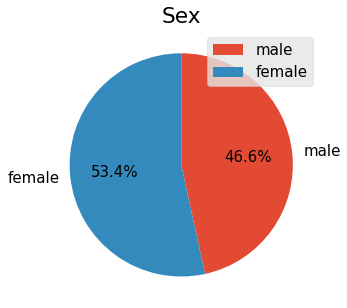

In [36]:
# 남녀 확진자 수의 비율
plt.figure(figsize=(5,5))
plt.rc('font', size=15)
plt.axis('equal')
plt.pie(sex_dict.values(), 
        labels=sex_dict.keys(), 
        autopct='%.1f%%',
        startangle=90, 
        counterclock=False)
plt.title("Sex")
plt.legend(sex_dict.keys())
plt.savefig('ratio_1.jpg')
plt.show()


$${male}_{Seoul} = \frac {서울 남자 확진자 수} {서울 한국 확진자}$$

$${femail}_{Seoul} = \frac {서울 여자 확진자 수} {서울 한국 확진자}$$   

???여자가 더 많으니까 더 많이 걸린거 아닐까   
그러면 비율로 따져보자???

## 남녀 코로나 인구수를 전체 인구수로 나눠서 비율로 따져도 여자가 더 높을까?

$${male}_{region} = \frac {서울 남자 확진자 수} {서울 한국 남자 인구수}$$

$${female}_{region} = \frac {서울 여자 확진자 수} {서울 한국 여자 인구수}$$ 

### 서울 인구수

In [22]:
report = pd.read_csv(data_path + 'report_ch.csv')
report

기간   자치구       세대    인구 합계    남자 합계    여자 합계   한국인 합계  한국 남자 합계  \
0   2020    합계  4417954  9911088  4816522  5094566  9668465   4701723   
1   2020   종로구    75003   158996    76876    82120   149384     72635   
2   2020    중구    63686   134635    65776    68859   125240     61222   
3   2020   용산구   113093   244645   118835   125810   230040    110722   
4   2020   성동구   135870   300505   146424   154081   293556    143387   
5   2020   광진구   167427   360109   173000   187109   346682    167310   
6   2020  동대문구   167598   357014   175322   181692   342837    169769   
7   2020   중랑구   185920   399562   197118   202444   394702    195165   
8   2020   성북구   195396   447056   214658   232398   437153    210810   
9   2020   강북구   145896   311569   151466   160103   308055    150143   
10  2020   도봉구   139114   327361   159420   167941   325257    158620   
11  2020   노원구   218270   527032   254188   272844   523037    252383   
12  2020   은평구   213914   484043   231998   252045   479835    230279   
13  2020  서대문구   144838   322952   153152   169800   312173    149360   
14  2020   마포구   178482   381858   178977   202881   371890    175150   
15  2020   양천구   180633   457781   224379   233402   454251    222824   
16  2020   강서구   266982   585901   282686   303215   580185    280034   
17  2020   구로구   180531   432488   215424   217064   404408    199673   
18  2020   금천구   114715   247835   126141   121694   231733    117226   
19  2020  영등포구   184714   407367   202969   204398   379480    187647   
20  2020   동작구   184229   401572   193718   207854   391220    189152   
21  2020   관악구   274811   509803   255211   254592   495060    248339   
22  2020   서초구   173502   429025   205282   223743   425126    203359   
23  2020   강남구   234872   544055   260378   283677   539231    257999   
24  2020   송파구   281959   673926   325080   348846   667960    322299   
25  2020   강동구   196499   463998   228044   235954   459970    226216   

    한국 여자 합계  외국인 합계  외국 남자 합계  외국 여자 합계  세대당인구  65세이상고령자  
0    4966742  242623    114799    127824   2.19   1568331  
1      76749    9612      4241      5371   1.99     28507  
2      64018    9395      4554      4841   1.97     24495  
3     119318   14605      8113      6492   2.03     40247  
4     150169    6949      3037      3912   2.16     45603  
5     179372   13427      5690      7737   2.07     50560  
6     173068   14177      5553      8624   2.05     61796  
7     199537    4860      1953      2907   2.12     69447  
8     226343    9903      3848      6055   2.24     73770  
9     157912    3514      1323      2191   2.11     63422  
10    166637    2104       800      1304   2.34     62059  
11    270654    3995      1805      2190   2.40     85489  
12    249556    4208      1719      2489   2.24     85187  
13    162813   10779      3792      6987   2.16     54204  
14    196740    9968      3827      6141   2.08     54331  
15    231427    3530      1555      1975   2.51     65670  
16    300151    5716      2652      3064   2.17     88984  
17    204735   28080     15751     12329   2.24     70198  
18    114507   16102      8915      7187   2.02     39842  
19    191833   27887     15322     12565   2.05     61688  
20    202068   10352      4566      5786   2.12     65190  
21    246721   14743      6872      7871   1.80     78875  
22    221767    3899      1923      1976   2.45     60169  
23    281232    4824      2379      2445   2.30     75096  
24    345661    5966      2781      3185   2.37     93483  
25    233754    4028      1828      2200   2.34     70019

In [23]:
# 외국인 제외한 서울거주 한국인
report_Korean = report[['자치구','한국 남자 합계','한국 여자 합계']]
report_Korean

자치구  한국 남자 합계  한국 여자 합계
0     합계   4701723   4966742
1    종로구     72635     76749
2     중구     61222     64018
3    용산구    110722    119318
4    성동구    143387    150169
5    광진구    167310    179372
6   동대문구    169769    173068
7    중랑구    195165    199537
8    성북구    210810    226343
9    강북구    150143    157912
10   도봉구    158620    166637
11   노원구    252383    270654
12   은평구    230279    249556
13  서대문구    149360    162813
14   마포구    175150    196740
15   양천구    222824    231427
16   강서구    280034    300151
17   구로구    199673    204735
18   금천구    117226    114507
19  영등포구    187647    191833
20   동작구    189152    202068
21   관악구    248339    246721
22   서초구    203359    221767
23   강남구    257999    281232
24   송파구    322299    345661
25   강동구    226216    233754

In [24]:
# 서울 남자, 여자 수
seoul_male = report_Korean.iloc[0][1] # index[0]에서 [1]번째
seoul_female = report_Korean.iloc[0][2]
print(seoul_male)
print(seoul_female)
# print(type(seoul_female))

4701723
4966742


In [25]:
# patientinfo_seoul에서 성별 데이터가 있는 것만 모으기
patientInfo_seoul_sex = patientInfo_seoul.dropna(subset=['sex'])['sex']
patientInfo_seoul_sex.isnull().sum()

0

In [26]:
patientInfo_seoul_sex.unique()

array(['male', 'female'], dtype=object)

###  성별 확진자 수

In [27]:
# 성별 확진자_num 세기
sex_dict = dict()

for key in list(patientInfo_seoul_sex.unique()):
    sex_dict[key] = len(patientInfo_seoul_sex[patientInfo_seoul_sex==key])
                        
sex_dict

{'male': 272, 'female': 312}

### 성별 확진자 비율

$${서울 남자 확진 비율}_{region} = \frac {서울 남자 확진자 수} {전체 서울 남자 인구수}$$

$${서울 여자 확진 비율}_{region} = \frac {서울 여자 확진자 수} {전체 서울 여자 인구수}$$ 

$$ graph = {서울 남자 확진 비율}_{region} : {서울 여자 확진 비율}_{region}$$

In [28]:
# 분자
confirmed_male = sex_dict['male']
confirmed_female = sex_dict['female']

In [29]:
# 분모
seoul_male = report_Korean.iloc[0][1] # index[0]에서 [1]번째
seoul_female = report_Korean.iloc[0][2]

In [30]:
# 성별 확진 비율 = 분자 / 분모
male_confirmed_ratio = confirmed_male / seoul_male
female_confirmed_ratio = confirmed_female / seoul_female

In [34]:
sex_dict_ratio = []

sex_dict_ratio.append(male_confirmed_ratio)
sex_dict_ratio.append(female_confirmed_ratio)
sex_dict_ratio

[47.94201167582257, 52.05798832417743]

In [32]:
# 성별 확진률끼리의 비율*100
# female_confirmed_ratio : male_confirmed_ratio
confirmed_ratio = []
male_confirmed_ratio = sex_dict_ratio[0]/(sex_dict_ratio[0]+sex_dict_ratio[1])*100
female_confirmed_ratio = sex_dict_ratio[1]/(sex_dict_ratio[0]+sex_dict_ratio[1])*100

confirmed_ratio.append(male_confirmed_ratio)
confirmed_ratio.append(female_confirmed_ratio)

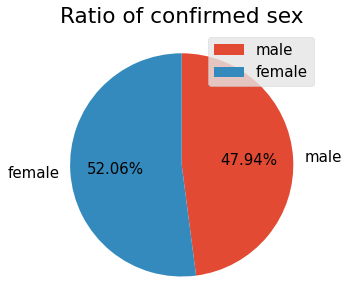

In [33]:
# 서울 인구 대비 확진률
plt.figure(figsize=(5,5))
plt.rc('font', size=15)
plt.axis('equal') # 깍두기도 가능
plt.pie(confirmed_ratio,
        labels=sex_dict.keys(),
        autopct='%.2f%%',
        startangle=90,
        counterclock=False)
plt.title('Ratio of confirmed sex')
plt.legend(sex_dict.keys())
plt.savefig('ratio_3.jpg')
plt.show()

여자 확진률 53.4 -> 52.03으로 감소  
: 서울에 여자 수가 남자 수보다 많아서  
여자 확진자가 많기도 함

무튼 그래도 여자 확진률이 더많다.  
-> 성별로 어떤 경로의 감염이 더 많았을까?

## 남녀별로 코로나 감염 경로 확인해보기

In [18]:
# infection_case 결측치 제거
patientInfo_seoul_infect = patientInfo_seoul.dropna(subset=['infection_case'])['infection_case']
patientInfo_seoul_infect.isnull().sum()

0

In [19]:
lst = list(patientInfo_seoul_infect.unique())
print(len(lst))
lst

34


['overseas inflow',
 'contact with patient',
 'Seongdong-gu APT',
 'etc',
 "Eunpyeong St. Mary's Hospital",
 'Shincheonji Church',
 'Dongan Church',
 'Guro-gu Call Center',
 'Itaewon Clubs',
 'Samsung Medical Center',
 'Biblical Language study meeting',
 'Coupang Logistics Center',
 'Guri Collective Infection',
 'KB Life Insurance',
 'Gangnam Dongin Church',
 'Korea Campus Crusade of Christ',
 'Yeongdeungpo Learning Institute',
 'Yeonana News Class',
 'SMR Newly Planted Churches Group',
 'Seocho Family',
 'Anyang Gunpo Pastors Group',
 'Richway',
 'Samsung Fire & Marine Insurance',
 'Yangcheon Table Tennis Club',
 'Yongin Brothers',
 'Day Care Center',
 'Geumcheon-gu rice milling machine manufacture',
 'Daezayeon Korea',
 'Orange Life',
 'Daejeon door-to-door sales',
 'Seoul City Hall Station safety worker',
 'Uiwang Logistics Center',
 'Wangsung Church',
 'Gangnam Yeoksam-dong gathering']

## case 재분류

위의 34개의 case -> 8개의 category로 재분류
  
1. 해외유입 : 'overseas inflow'
2. 일반인 접촉 : 'contact with patient', 'Seongdong-gu APT', 'Seocho Family'
3. 사교 활동 : 'Itaewon Clubs', 'Yangcheon Table Tennis Club', 'Gangnam Yeoksam-dong gathering', 'Guri Collective Infection', 'Yongin Brothers'
4. 직장 : 'Richway', 'Guro-gu Call Center', Day Care Center', 'KB Life Insurance', 'Geumcheon-gu rice milling machine manufacture', 'Samsung Fire & Marine Insurance', 'Daezayeon Korea', 'Seoul City Hall Station safety worker' , 'Uiwang Logistics Center', 'Orange Life', 'Daejeon door-to-door sales'
5. 종교활동 : 'SMR Newly Planted Churches Group', 'Wangsung Church', 'Dongan Church', 'Korea Campus Crusade of Christ',  'Guri Collective Infection', 'Shincheonji Church', 'Gangnam Dongin Church', 'Anyang Gunpo Pastors Group', 'Biblical Language study meeting'
6. 병원 :  "Eunpyeong St. Mary's Hospital", 'Samsung Medical Center', 
7. 학원 : 'Yeonana News Class', 'Yeongdeungpo Learning Institute'
8. etc : 'etc' 


해외유입, 일반인 접촉, 유흥 및 사교활동, 직장, 종교활동, 병원, 학원, etc  
{'overseas inflow' : 해외유입  
 'contact with patient' : 일반인 접촉  
 'Itaewon Clubs' : 유흥  
 'Richway' : 직장  
 'etc' :  
 'Guro-gu Call Center' : 직장  
 'Yangcheon Table Tennis Club' : 유흥  
 'Day Care Center' : 직장  
 'SMR Newly Planted Churches Group' : 종교활동  
 'Coupang Logistics Center' : 직장  
 'Wangsung Church' : 종교활동  
 'Dongan Church' :종교활동  
 "Eunpyeong St. Mary's Hospital" : 병원  
 'Seongdong-gu APT' : 일반인 접촉 (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7248591/)    
 'KB Life Insurance' : 직장    
 'Samsung Medical Center' : 병원  
 'Korea Campus Crusade of Christ' : 종교활동  
 'Geumcheon-gu rice milling machine manufacture' : 직장  
 'Gangnam Yeoksam-dong gathering' : 사교 활동  
 'Guri Collective Infection' : 사교 활동
 'Yeonana News Class' : 학원  
 'Seocho Family' : 일반인 접촉  
 'Samsung Fire & Marine Insurance' : 직장  
 'Yongin Brothers' : 유흥  
 'Shincheonji Church' : 종교활동  
 'Biblical Language study meeting' : 학원  
 'Yeongdeungpo Learning Institute' : 학원  
 'Daezayeon Korea' : 직장  
 'Seoul City Hall Station safety worker' : 직장  
 'Uiwang Logistics Center' : 직장  
 'Gangnam Dongin Church' : 종교활동  
 'Anyang Gunpo Pastors Group' : 종교활동  
 'Orange Life' : 직장  
 'Daejeon door-to-door sales' : 직장}

In [20]:
infection_dict = dict()

for key in list(patientInfo_seoul_infect.unique()):
    infection_dict[key] = len(patientInfo_seoul_infect[patientInfo_seoul_infect == key])

infection_dict = dict(sorted(infection_dict.items(), key=lambda x: x[1], reverse=True))
print(sum(infection_dict.values()))
infection_dict

1227


{'overseas inflow': 306,
 'contact with patient': 171,
 'Itaewon Clubs': 139,
 'Richway': 119,
 'etc': 99,
 'Guro-gu Call Center': 95,
 'Yangcheon Table Tennis Club': 43,
 'Day Care Center': 43,
 'SMR Newly Planted Churches Group': 36,
 'Coupang Logistics Center': 25,
 'Wangsung Church': 24,
 'Dongan Church': 17,
 "Eunpyeong St. Mary's Hospital": 14,
 'Seongdong-gu APT': 13,
 'KB Life Insurance': 13,
 'Samsung Medical Center': 7,
 'Korea Campus Crusade of Christ': 7,
 'Geumcheon-gu rice milling machine manufacture': 6,
 'Gangnam Yeoksam-dong gathering': 6,
 'Guri Collective Infection': 5,
 'Yeonana News Class': 5,
 'Seocho Family': 5,
 'Samsung Fire & Marine Insurance': 4,
 'Yongin Brothers': 4,
 'Shincheonji Church': 3,
 'Biblical Language study meeting': 3,
 'Yeongdeungpo Learning Institute': 3,
 'Daezayeon Korea': 3,
 'Seoul City Hall Station safety worker': 3,
 'Uiwang Logistics Center': 2,
 'Gangnam Dongin Church': 1,
 'Anyang Gunpo Pastors Group': 1,
 'Orange Life': 1,
 'Daejeon 

### 34개로 나누기

In [21]:
overseas_inflow = patientInfo_seoul[patientInfo_seoul['infection_case']=='overseas inflow']
len(overseas_inflow)
overseas_inflow

patient_id   sex  age country province          city   infection_case  \
0     1000000001  male  50s   Korea    Seoul    Gangseo-gu  overseas inflow   
1     1000000002  male  30s   Korea    Seoul   Jungnang-gu  overseas inflow   
3     1000000004  male  20s   Korea    Seoul       Mapo-gu  overseas inflow   
7     1000000008  male  20s   Korea    Seoul           etc  overseas inflow   
8     1000000009  male  30s   Korea    Seoul     Songpa-gu  overseas inflow   
...          ...   ...  ...     ...      ...           ...              ...   
1279  1000001280   NaN  NaN   Korea    Seoul  Eunpyeong-gu  overseas inflow   
1281  1000001282   NaN  NaN   Korea    Seoul       Jung-gu  overseas inflow   
1292  1000001293   NaN  NaN   Korea    Seoul  Yangcheon-gu  overseas inflow   
1302  1000001303   NaN  NaN   Korea    Seoul     Seocho-gu  overseas inflow   
1305  1000001306   NaN  NaN   Korea    Seoul      Nowon-gu  overseas inflow   

     infected_by contact_number symptom_onset_date confirmed_date  \
0            NaN             75         2020-01-22     2020-01-23   
1            NaN             31                NaN     2020-01-30   
3            NaN              9         2020-01-26     2020-01-30   
7            NaN              0                NaN     2020-02-02   
8            NaN             68                NaN     2020-02-05   
...          ...            ...                ...            ...   
1279         NaN            NaN                NaN     2020-06-26   
1281         NaN            NaN                NaN     2020-06-26   
1292         NaN            NaN                NaN     2020-06-27   
1302         NaN            NaN                NaN     2020-06-28   
1305         NaN            NaN                NaN     2020-06-29   

     released_date deceased_date     state  
0       2020-02-05           NaN  released  
1       2020-03-02           NaN  released  
3       2020-02-15           NaN  released  
7       2020-02-24           NaN  released  
8       2020-02-21           NaN  released  
...            ...           ...       ...  
1279           NaN           NaN  isolated  
1281           NaN           NaN  isolated  
1292           NaN           NaN  isolated  
1302           NaN           NaN  isolated  
1305           NaN           NaN  isolated  

[306 rows x 14 columns]

In [22]:
contact_with_patient = patientInfo_seoul[patientInfo_seoul['infection_case']=='contact with patient']
len(contact_with_patient)

171

In [23]:
Seongdong_gu_APT = patientInfo_seoul[patientInfo_seoul['infection_case']=='Seongdong-gu APT']
len(Seongdong_gu_APT)

13

In [24]:
Seocho_Family = patientInfo_seoul[patientInfo_seoul['infection_case']=='Seocho Family']
len(Seocho_Family)

5

In [25]:
Itaewon_Clubs = patientInfo_seoul[patientInfo_seoul['infection_case']=='Itaewon Clubs']
len(Itaewon_Clubs)

139

In [26]:
Table_Tennis_Club = patientInfo_seoul[patientInfo_seoul['infection_case']=='Yangcheon Table Tennis Club']
len(Table_Tennis_Club)

43

In [27]:
Yeoksam = patientInfo_seoul[patientInfo_seoul['infection_case']=='Gangnam Yeoksam-dong gathering']
len(Yeoksam)

6

In [28]:
Guri = patientInfo_seoul[patientInfo_seoul['infection_case']=='Guri Collective Infection']
len(Guri)

5

In [29]:
Yongin_Brothers = patientInfo_seoul[patientInfo_seoul['infection_case']=='Yongin Brothers']
len(Yongin_Brothers)

4

In [30]:
Richway = patientInfo_seoul[patientInfo_seoul['infection_case']=='Richway']
len(Richway)

119

In [31]:
Call_Center = patientInfo_seoul[patientInfo_seoul['infection_case']=='Guro-gu Call Center']
len(Call_Center)

95

In [32]:
Day_Care_Center = patientInfo_seoul[patientInfo_seoul['infection_case']=='Day Care Center']
len(Day_Care_Center)

43

In [33]:
KB_Life = patientInfo_seoul[patientInfo_seoul['infection_case']=='KB Life Insurance']
len(KB_Life)

13

In [34]:
Geumcheon_gu_rice = patientInfo_seoul[patientInfo_seoul['infection_case']=='Geumcheon-gu rice milling machine manufacture']
len(Geumcheon_gu_rice)

6

In [35]:
Samsung_Insurance = patientInfo_seoul[patientInfo_seoul['infection_case']=='Samsung Fire & Marine Insurance']
len(Samsung_Insurance)

4

In [36]:
Daezayeon = patientInfo_seoul[patientInfo_seoul['infection_case']=='Daezayeon Korea']
len(Daezayeon)

3

In [37]:
Seoul_City_Hall_Station= patientInfo_seoul[patientInfo_seoul['infection_case']=='Seoul City Hall Station safety worker']
len(Seoul_City_Hall_Station)

3

In [38]:
Uiwang = patientInfo_seoul[patientInfo_seoul['infection_case']=='Uiwang Logistics Center']
len(Uiwang)

2

In [39]:
Orange = patientInfo_seoul[patientInfo_seoul['infection_case']=='Orange Life']
len(Orange)

1

In [40]:
Daejeon_door_sales = patientInfo_seoul[patientInfo_seoul['infection_case']=='Daejeon door-to-door sales']
len(Daejeon_door_sales)

1

In [41]:
SMR = patientInfo_seoul[patientInfo_seoul['infection_case']=='SMR Newly Planted Churches Group']
len(SMR)

36

In [42]:
Wangsung = patientInfo_seoul[patientInfo_seoul['infection_case']=='Wangsung Church']
len(Wangsung)

24

In [43]:
Dongan = patientInfo_seoul[patientInfo_seoul['infection_case']=='Dongan Church']
len(Dongan)

17

In [44]:
Christ = patientInfo_seoul[patientInfo_seoul['infection_case']=='Korea Campus Crusade of Christ']
len(Christ)

7

In [45]:
Guri = patientInfo_seoul[patientInfo_seoul['infection_case']=='Guri Collective Infection']
len(Guri)

5

In [46]:
Shincheonji = patientInfo_seoul[patientInfo_seoul['infection_case']=='Shincheonji Church']
len(Shincheonji)

3

In [47]:
Dongin = patientInfo_seoul[patientInfo_seoul['infection_case']=='Gangnam Dongin Church']
len(Dongin)

1

In [48]:
Anyang = patientInfo_seoul[patientInfo_seoul['infection_case']=='Anyang Gunpo Pastors Group']
len(Anyang)

1

In [49]:
Eunpyeong = patientInfo_seoul[patientInfo_seoul['infection_case']=="Eunpyeong St. Mary's Hospital"]
len(Eunpyeong)

14

In [50]:
Samsung_Medical = patientInfo_seoul[patientInfo_seoul['infection_case']=='Samsung Medical Center']
len(Samsung_Medical)

7

In [51]:
News_Class = patientInfo_seoul[patientInfo_seoul['infection_case']=='Yeonana News Class']
len(News_Class)

5

In [52]:
Biblical= patientInfo_seoul[patientInfo_seoul['infection_case']=='Biblical Language study meeting']
len(Biblical)

3

In [53]:
Yeongdeungpo = patientInfo_seoul[patientInfo_seoul['infection_case']=='Yeongdeungpo Learning Institute']
len(Yeongdeungpo)

3

In [54]:
etc = patientInfo_seoul[patientInfo_seoul['infection_case']=='etc']
len(etc)

99

### 재결합(concat)

34개 -> 8개의 카테고리 재결합


In [55]:
ctg_list = ['overseas_inflow', 'contact', 'social_act', 'worker', 'religion', 'hospital', 'academy', 'etc']
# print(type(ctg_list))
# print(len(ctg_list))

In [56]:
contact = pd.concat([contact_with_patient, Seongdong_gu_APT, Seocho_Family], ignore_index=True)
contact

patient_id     sex  age country province          city  \
0    1000000003    male  50s   Korea    Seoul     Jongno-gu   
1    1000000005  female  20s   Korea    Seoul   Seongbuk-gu   
2    1000000006  female  50s   Korea    Seoul     Jongno-gu   
3    1000000007    male  20s   Korea    Seoul     Jongno-gu   
4    1000000010  female  60s   Korea    Seoul   Seongbuk-gu   
..          ...     ...  ...     ...      ...           ...   
184  1000000870     NaN  NaN   Korea    Seoul     Seocho-gu   
185  1000000871     NaN  NaN   Korea    Seoul     Seocho-gu   
186  1000000884     NaN  NaN   Korea    Seoul    Gangbuk-gu   
187  1000000885     NaN  NaN   Korea    Seoul  Seodaemun-gu   
188  1000000886     NaN  NaN   Korea    Seoul  Seodaemun-gu   

           infection_case infected_by contact_number symptom_onset_date  \
0    contact with patient  2002000001             17                NaN   
1    contact with patient  1000000002              2                NaN   
2    contact with patient  1000000003             43                NaN   
3    contact with patient  1000000003              0                NaN   
4    contact with patient  1000000003              6                NaN   
..                    ...         ...            ...                ...   
184         Seocho Family         NaN            NaN                NaN   
185         Seocho Family         NaN            NaN                NaN   
186         Seocho Family         NaN            NaN                NaN   
187         Seocho Family         NaN            NaN                NaN   
188         Seocho Family         NaN            NaN                NaN   

    confirmed_date released_date deceased_date     state  
0       2020-01-30    2020-02-19           NaN  released  
1       2020-01-31    2020-02-24           NaN  released  
2       2020-01-31    2020-02-19           NaN  released  
3       2020-01-31    2020-02-10           NaN  released  
4       2020-02-05    2020-02-29           NaN  released  
..             ...           ...           ...       ...  
184     2020-06-01           NaN           NaN  released  
185     2020-06-01           NaN           NaN  isolated  
186     2020-06-02           NaN           NaN  released  
187     2020-06-02           NaN           NaN  released  
188     2020-06-02           NaN           NaN  released  

[189 rows x 14 columns]

In [57]:
social_act = pd.concat([Itaewon_Clubs, Table_Tennis_Club, Yeoksam, Guri, Yongin_Brothers], ignore_index=True)
social_act

patient_id  sex  age country province             city  \
0    1000000638  NaN  NaN   Korea    Seoul        Jongno-gu   
1    1000000639  NaN  NaN   Korea    Seoul       Yongsan-gu   
2    1000000640  NaN  NaN   Korea    Seoul       Yongsan-gu   
3    1000000641  NaN  NaN   Korea    Seoul       Yongsan-gu   
4    1000000642  NaN  NaN   Korea    Seoul       Yongsan-gu   
..          ...  ...  ...     ...      ...              ...   
192  1000000853  NaN  NaN   Korea    Seoul       Gangnam-gu   
193  1000000922  NaN  NaN   Korea    Seoul      Gangdong-gu   
194  1000000948  NaN  NaN   Korea    Seoul          Guro-gu   
195  1000000962  NaN  NaN   Korea    Seoul  Yeongdeungpo-gu   
196  1000000966  NaN  NaN   Korea    Seoul          Guro-gu   

                infection_case infected_by contact_number symptom_onset_date  \
0                Itaewon Clubs         NaN            NaN                NaN   
1                Itaewon Clubs         NaN            NaN                NaN   
2                Itaewon Clubs         NaN            NaN         2020-05-04   
3                Itaewon Clubs         NaN            NaN         2020-05-07   
4                Itaewon Clubs         NaN            NaN         2020-05-05   
..                         ...         ...            ...                ...   
192  Guri Collective Infection         NaN            NaN                NaN   
193            Yongin Brothers         NaN            NaN         2020-06-01   
194            Yongin Brothers  2000000889            NaN                NaN   
195            Yongin Brothers         NaN            NaN                NaN   
196            Yongin Brothers         NaN            NaN                NaN   

    confirmed_date released_date deceased_date     state  
0       2020-05-08           NaN           NaN  released  
1       2020-05-08           NaN           NaN  released  
2       2020-05-08           NaN           NaN  released  
3       2020-05-08           NaN           NaN  released  
4       2020-05-08           NaN           NaN  released  
..             ...           ...           ...       ...  
192     2020-05-29           NaN           NaN  released  
193     2020-06-04           NaN           NaN  released  
194     2020-06-05           NaN           NaN  isolated  
195     2020-06-06           NaN           NaN  released  
196     2020-06-06           NaN           NaN  released  

[197 rows x 14 columns]

In [58]:
worker = pd.concat([Richway, Call_Center, Day_Care_Center, KB_Life, Geumcheon_gu_rice, 
                    Samsung_Insurance, Daezayeon, Seoul_City_Hall_Station, 
                   Uiwang, Orange, Daejeon_door_sales], ignore_index=True)

worker

patient_id  sex  age country province             city  \
0    1000000887  NaN  NaN   Korea    Seoul          Guro-gu   
1    1000000897  NaN  NaN   Korea    Seoul       Yongsan-gu   
2    1000000903  NaN  NaN   Korea    Seoul       Gangnam-gu   
3    1000000904  NaN  NaN   Korea    Seoul              etc   
4    1000000912  NaN  NaN   Korea    Seoul       Yongsan-gu   
..          ...  ...  ...     ...      ...              ...   
285  1000001219  NaN  NaN   Korea    Seoul  Yeongdeungpo-gu   
286  1000001209  NaN  NaN   Korea    Seoul        Seocho-gu   
287  1000001213  NaN  NaN   Korea    Seoul  Yeongdeungpo-gu   
288  1000001192  NaN  NaN   Korea    Seoul     Seodaemun-gu   
289  1000001193  NaN  NaN   Korea    Seoul       Dongjak-gu   

                            infection_case infected_by contact_number  \
0                                  Richway         NaN            NaN   
1                                  Richway         NaN            NaN   
2                                  Richway         NaN            NaN   
3                                  Richway         NaN            NaN   
4                                  Richway         NaN            NaN   
..                                     ...         ...            ...   
285  Seoul City Hall Station safety worker         NaN            NaN   
286                Uiwang Logistics Center         NaN            NaN   
287                Uiwang Logistics Center         NaN            NaN   
288                            Orange Life         NaN            NaN   
289             Daejeon door-to-door sales         NaN            NaN   

    symptom_onset_date confirmed_date released_date deceased_date     state  
0           2020-05-31     2020-06-02           NaN           NaN  released  
1           2020-05-23     2020-06-03           NaN           NaN  released  
2                  NaN     2020-06-03           NaN           NaN  released  
3                  NaN     2020-06-03           NaN           NaN  isolated  
4                  NaN     2020-06-04           NaN           NaN  released  
..                 ...            ...           ...           ...       ...  
285                NaN     2020-06-20           NaN           NaN  isolated  
286                NaN     2020-06-20           NaN           NaN  isolated  
287                NaN     2020-06-20           NaN           NaN  isolated  
288                NaN     2020-06-19           NaN           NaN  isolated  
289                NaN     2020-06-19           NaN           NaN  isolated  

[290 rows x 14 columns]

In [59]:
religion = pd.concat([SMR, Wangsung, Dongan, Christ, Guri, Shincheonji, Dongin, Anyang, Biblical], 
                     ignore_index=True)
religion

patient_id     sex  age country province             city  \
0   1000000864  female  60s   Korea    Seoul       Gangseo-gu   
1   1000000865    male  50s   Korea    Seoul       Gangseo-gu   
2   1000000866     NaN  NaN   Korea    Seoul  Yeongdeungpo-gu   
3   1000000869  female  50s   Korea    Seoul     Yangcheon-gu   
4   1000000873     NaN  NaN   Korea    Seoul        Gwanak-gu   
..         ...     ...  ...     ...      ...              ...   
92  1000000831     NaN  NaN   Korea    Seoul          Mapo-gu   
93  1000000882     NaN  NaN   Korea    Seoul     Geumcheon-gu   
94  1000000754    male  30s   Korea    Seoul     Yangcheon-gu   
95  1000000843     NaN  NaN   Korea    Seoul        Songpa-gu   
96  1000000848     NaN  NaN   Korea    Seoul        Songpa-gu   

                      infection_case infected_by contact_number  \
0   SMR Newly Planted Churches Group         NaN            NaN   
1   SMR Newly Planted Churches Group         NaN            NaN   
2   SMR Newly Planted Churches Group         NaN            NaN   
3   SMR Newly Planted Churches Group         NaN            NaN   
4   SMR Newly Planted Churches Group         NaN            NaN   
..                               ...         ...            ...   
92             Gangnam Dongin Church         NaN            NaN   
93        Anyang Gunpo Pastors Group         NaN            NaN   
94   Biblical Language study meeting         NaN            NaN   
95   Biblical Language study meeting         NaN            NaN   
96   Biblical Language study meeting         NaN            NaN   

   symptom_onset_date confirmed_date released_date deceased_date     state  
0                 NaN     2020-06-01           NaN           NaN  released  
1                 NaN     2020-06-01           NaN           NaN  isolated  
2                 NaN     2020-06-01           NaN           NaN  released  
3                 NaN     2020-06-01           NaN           NaN  released  
4                 NaN     2020-06-01           NaN           NaN  released  
..                ...            ...           ...           ...       ...  
92                NaN     2020-05-28           NaN           NaN  released  
93                NaN     2020-06-02           NaN           NaN  isolated  
94         2020-05-18     2020-05-20           NaN           NaN  released  
95         2020-05-26     2020-05-28           NaN           NaN  released  
96                NaN     2020-05-29           NaN           NaN  released  

[97 rows x 14 columns]

In [60]:
hospital = pd.concat([Eunpyeong, Samsung_Medical], ignore_index=True)
hospital

patient_id     sex  age country province          city  \
0   1000000022    male  30s   Korea    Seoul  Seodaemun-gu   
1   1000000025    male  60s   Korea    Seoul   Gangdong-gu   
2   1000000028  female  70s   Korea    Seoul     Jongno-gu   
3   1000000029  female  20s   Korea    Seoul     Jongno-gu   
4   1000000030    male  60s   China    Seoul   Gangdong-gu   
5   1000000036  female  50s   Korea    Seoul  Eunpyeong-gu   
6   1000000049    male  60s   Korea    Seoul  Eunpyeong-gu   
7   1000000053  female  40s   Korea    Seoul  Eunpyeong-gu   
8   1000000054  female  80s   Korea    Seoul  Eunpyeong-gu   
9   1000000055  female  20s   Korea    Seoul  Yangcheon-gu   
10  1000000057  female  70s   Korea    Seoul           etc   
11  1000000059  female  60s   Korea    Seoul  Eunpyeong-gu   
12  1000000060    male  80s   Korea    Seoul  Eunpyeong-gu   
13  1000000061    male  60s   Korea    Seoul  Seodaemun-gu   
14  1000000742     NaN  NaN   Korea    Seoul     Songpa-gu   
15  1000000748     NaN  NaN   Korea    Seoul     Seocho-gu   
16  1000000749     NaN  NaN   Korea    Seoul    Gangnam-gu   
17  1000000751     NaN  NaN   Korea    Seoul    Gangbuk-gu   
18  1000000756     NaN  NaN   Korea    Seoul           etc   
19  1000000760     NaN  NaN   Korea    Seoul     Seocho-gu   
20  1000000761     NaN  NaN   Korea    Seoul           etc   

                   infection_case infected_by contact_number  \
0   Eunpyeong St. Mary's Hospital         NaN            NaN   
1   Eunpyeong St. Mary's Hospital  1000000022            NaN   
2   Eunpyeong St. Mary's Hospital         NaN            NaN   
3   Eunpyeong St. Mary's Hospital  1000000028            NaN   
4   Eunpyeong St. Mary's Hospital         NaN            NaN   
5   Eunpyeong St. Mary's Hospital         NaN            NaN   
6   Eunpyeong St. Mary's Hospital         NaN            NaN   
7   Eunpyeong St. Mary's Hospital  1000000054            NaN   
8   Eunpyeong St. Mary's Hospital         NaN            NaN   
9   Eunpyeong St. Mary's Hospital         NaN            NaN   
10  Eunpyeong St. Mary's Hospital         NaN            NaN   
11  Eunpyeong St. Mary's Hospital  1000000060            NaN   
12  Eunpyeong St. Mary's Hospital  1000000054            NaN   
13  Eunpyeong St. Mary's Hospital  1000000022            NaN   
14         Samsung Medical Center         NaN            NaN   
15         Samsung Medical Center         NaN            NaN   
16         Samsung Medical Center         NaN            NaN   
17         Samsung Medical Center         NaN            NaN   
18         Samsung Medical Center         NaN            NaN   
19         Samsung Medical Center         NaN            NaN   
20         Samsung Medical Center         NaN            NaN   

   symptom_onset_date confirmed_date released_date deceased_date     state  
0                 NaN     2020-02-21           NaN           NaN  released  
1                 NaN     2020-02-22           NaN           NaN  released  
2                 NaN     2020-02-23    2020-03-11           NaN  released  
3          2020-02-11     2020-02-26    2020-03-11           NaN  released  
4                 NaN     2020-02-23           NaN           NaN  released  
5                 NaN     2020-02-25           NaN           NaN  released  
6                 NaN     2020-02-26           NaN           NaN  released  
7          2020-02-25     2020-02-27    2020-03-17           NaN  released  
8                 NaN     2020-02-27           NaN           NaN  released  
9                 NaN     2020-02-27    2020-03-03           NaN  released  
10                NaN     2020-02-27           NaN           NaN  released  
11                NaN     2020-02-28           NaN           NaN  released  
12         2020-02-23     2020-02-28           NaN           NaN  released  
13         2020-02-26     2020-02-28    2020-03-14           NaN  released  
14                NaN     2020-05-18           NaN           NaN  isolated 

In [61]:
academy = pd.concat([News_Class, Yeongdeungpo], ignore_index=True)
academy

patient_id  sex  age country province             city  \
0  1000000854  NaN  NaN   Korea    Seoul     Seodaemun-gu   
1  1000000859  NaN  NaN   Korea    Seoul  Yeongdeungpo-gu   
2  1000000860  NaN  NaN   Korea    Seoul  Yeongdeungpo-gu   
3  1000000861  NaN  NaN   Korea    Seoul  Yeongdeungpo-gu   
4  1000001107  NaN  NaN   Korea    Seoul  Yeongdeungpo-gu   
5  1000000844  NaN  NaN   Korea    Seoul  Yeongdeungpo-gu   
6  1000000845  NaN  NaN   Korea    Seoul  Yeongdeungpo-gu   
7  1000000868  NaN  NaN   Korea    Seoul  Yeongdeungpo-gu   

                    infection_case infected_by contact_number  \
0               Yeonana News Class         NaN            NaN   
1               Yeonana News Class         NaN            NaN   
2               Yeonana News Class         NaN            NaN   
3               Yeonana News Class         NaN            NaN   
4               Yeonana News Class         NaN            NaN   
5  Yeongdeungpo Learning Institute         NaN            NaN   
6  Yeongdeungpo Learning Institute         NaN            NaN   
7  Yeongdeungpo Learning Institute         NaN            NaN   

  symptom_onset_date confirmed_date released_date deceased_date     state  
0                NaN     2020-05-29           NaN           NaN  released  
1         2020-05-27     2020-05-30           NaN           NaN  released  
2         2020-05-28     2020-05-30           NaN           NaN  released  
3                NaN     2020-05-30           NaN           NaN  released  
4                NaN     2020-06-13           NaN           NaN  isolated  
5                NaN     2020-05-28           NaN           NaN  released  
6                NaN     2020-05-28           NaN           NaN  released  
7                NaN     2020-06-01           NaN           NaN  released

In [62]:
etc # (ignore_index=True)

patient_id   sex  age country province          city infection_case  \
17    1000000018  male  20s   Korea    Seoul           etc            etc   
25    1000000026  male  30s   Korea    Seoul     Seocho-gu            etc   
30    1000000031  male  50s   Korea    Seoul     Songpa-gu            etc   
34    1000000035  male  30s   Korea    Seoul           etc            etc   
37    1000000038  male  60s   Korea    Seoul           etc            etc   
...          ...   ...  ...     ...      ...           ...            ...   
585   1000000586   NaN  NaN   Korea    Seoul  Seongdong-gu            etc   
594   1000000595   NaN  NaN   Korea    Seoul   Seongbuk-gu            etc   
600   1000000601   NaN  NaN   Korea    Seoul     Gwanak-gu            etc   
727   1000000728   NaN  NaN   Korea    Seoul  Eunpyeong-gu            etc   
1142  1000001143   NaN  NaN   Korea    Seoul       Mapo-gu            etc   

     infected_by contact_number symptom_onset_date confirmed_date  \
17           NaN            NaN                NaN     2020-02-20   
25           NaN            NaN         2020-02-21     2020-02-22   
30           NaN            NaN                NaN     2020-02-22   
34           NaN            NaN         2020-02-19     2020-02-25   
37           NaN            NaN         2020-02-24     2020-02-25   
...          ...            ...                ...            ...   
585          NaN            NaN         2020-04-05     2020-04-08   
594          NaN            NaN                NaN     2020-04-09   
600          NaN            NaN                NaN     2020-04-11   
727          NaN            NaN                NaN     2020-05-15   
1142         NaN            NaN                NaN     2020-06-16   

     released_date deceased_date     state  
17             NaN           NaN  released  
25      2020-03-11           NaN  released  
30      2020-03-19           NaN  released  
34      2020-03-20           NaN  released  
37             NaN           NaN  released  
...            ...           ...       ...  
585            NaN           NaN  released  
594            NaN           NaN  released  
600            NaN           NaN  released  
727            NaN           NaN  released  
1142           NaN           NaN  released  

[99 rows x 14 columns]

In [63]:
overseas_inflow

patient_id   sex  age country province          city   infection_case  \
0     1000000001  male  50s   Korea    Seoul    Gangseo-gu  overseas inflow   
1     1000000002  male  30s   Korea    Seoul   Jungnang-gu  overseas inflow   
3     1000000004  male  20s   Korea    Seoul       Mapo-gu  overseas inflow   
7     1000000008  male  20s   Korea    Seoul           etc  overseas inflow   
8     1000000009  male  30s   Korea    Seoul     Songpa-gu  overseas inflow   
...          ...   ...  ...     ...      ...           ...              ...   
1279  1000001280   NaN  NaN   Korea    Seoul  Eunpyeong-gu  overseas inflow   
1281  1000001282   NaN  NaN   Korea    Seoul       Jung-gu  overseas inflow   
1292  1000001293   NaN  NaN   Korea    Seoul  Yangcheon-gu  overseas inflow   
1302  1000001303   NaN  NaN   Korea    Seoul     Seocho-gu  overseas inflow   
1305  1000001306   NaN  NaN   Korea    Seoul      Nowon-gu  overseas inflow   

     infected_by contact_number symptom_onset_date confirmed_date  \
0            NaN             75         2020-01-22     2020-01-23   
1            NaN             31                NaN     2020-01-30   
3            NaN              9         2020-01-26     2020-01-30   
7            NaN              0                NaN     2020-02-02   
8            NaN             68                NaN     2020-02-05   
...          ...            ...                ...            ...   
1279         NaN            NaN                NaN     2020-06-26   
1281         NaN            NaN                NaN     2020-06-26   
1292         NaN            NaN                NaN     2020-06-27   
1302         NaN            NaN                NaN     2020-06-28   
1305         NaN            NaN                NaN     2020-06-29   

     released_date deceased_date     state  
0       2020-02-05           NaN  released  
1       2020-03-02           NaN  released  
3       2020-02-15           NaN  released  
7       2020-02-24           NaN  released  
8       2020-02-21           NaN  released  
...            ...           ...       ...  
1279           NaN           NaN  isolated  
1281           NaN           NaN  isolated  
1292           NaN           NaN  isolated  
1302           NaN           NaN  isolated  
1305           NaN           NaN  isolated  

[306 rows x 14 columns]

## 2) 코로나는 어떤 경로로 많이 전염될까?

### 8개의  ctg 그래프 그리기

In [64]:
# list 안에 있는 df 길이재서 list만들기
ctg = [overseas_inflow, contact, social_act, worker, religion, hospital, academy, etc]

num_confirm = []
for i in ctg:
    num_confirm.append(len(i))
    
print(type(num_confirm))
num_confirm

<class 'list'>


[306, 189, 197, 290, 97, 21, 8, 99]

In [65]:
# 카테고리 이름 만으로 list만들기 
ctg_list = ['overseas_inflow', 'contact', 'social_act', 'worker', 'religion', 'hospital', 'academy', 'etc']
ctg_list

['overseas_inflow',
 'contact',
 'social_act',
 'worker',
 'religion',
 'hospital',
 'academy',
 'etc']

In [112]:
# 카테고리 이름과 확진자수로 dict 만들기
ctg_dict = dict()

for i in range(len(ctg_list)) :
    ctg_dict[ctg_list[i]] = num_confirm[i]
    
ctg_dict

{'overseas_inflow': 306,
 'contact': 189,
 'social_act': 197,
 'worker': 290,
 'religion': 97,
 'hospital': 21,
 'academy': 8,
 'etc': 99}

In [113]:
# dictionary 확진자 수를 기준으로 정렬
# 참고 : sex_dict = dict(sorted(sex_dict.items(), key=lambda x: x[1], reverse=True))

ctg_dict = dict(sorted(ctg_dict.items(), key=lambda x :x[1], reverse=True))
ctg_dict

{'overseas_inflow': 306,
 'worker': 290,
 'social_act': 197,
 'contact': 189,
 'etc': 99,
 'religion': 97,
 'hospital': 21,
 'academy': 8}

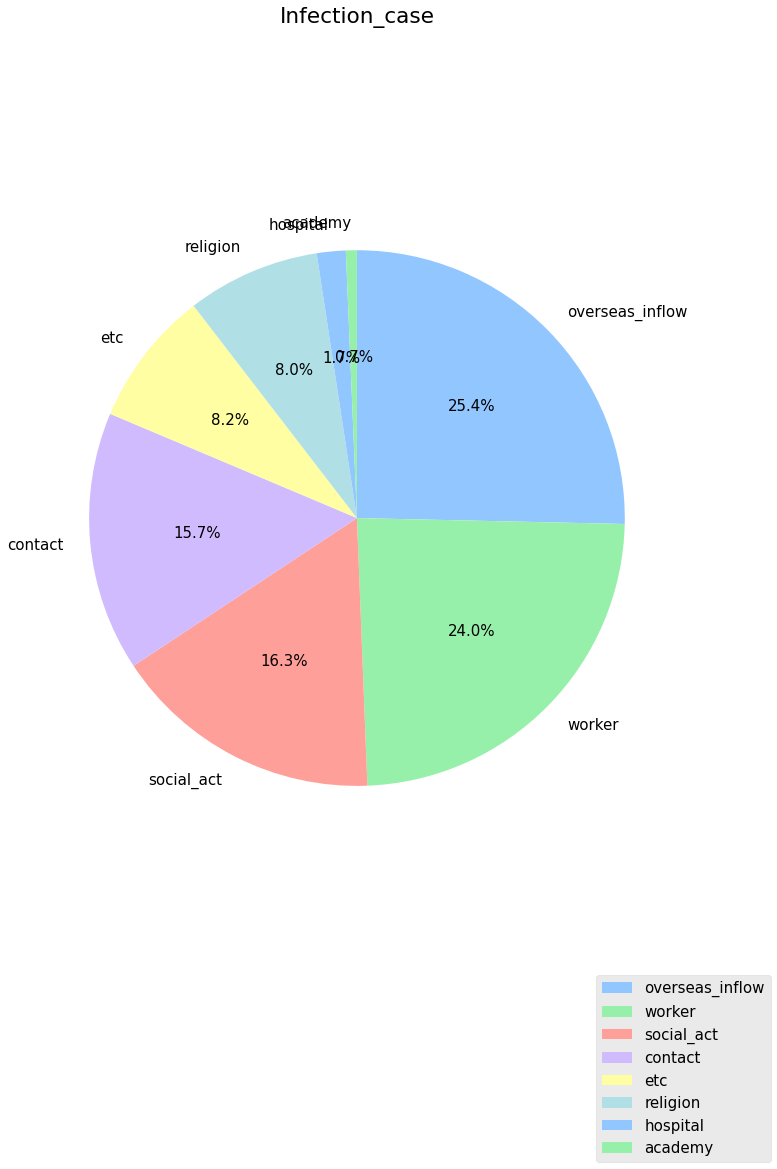

In [100]:
plt.figure(figsize=(12,18))
plt.style.use(['seaborn-pastel'])
plt.rc('font', size=15)
plt.axis('equal') # 타원 -> 원형으로 바꿔줌
plt.pie(ctg_dict.values(),
        autopct='%.1f%%',
        labels=ctg_dict.keys(),
        startangle=90,
        counterclock=False)
plt.title('Infection_case')
plt.legend(ctg_dict.keys(), bbox_to_anchor=(1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
# plt.legend(ctg_dict.keys())
plt.savefig('infection_1.jpg')
plt.show()
# print(autopct='%.2f%%')

In [110]:
ctg_pct_dict={'overseas_inflow 25.35%': 306,
 'worker 24.03%': 290,
 'social_act 16.32%': 197,
 'contact 15.66%': 189,
 'etc 8.2%': 99,
 'religion 8%': 97,
 'hospital 1.7%': 21,
 'academy 0.7%': 8}

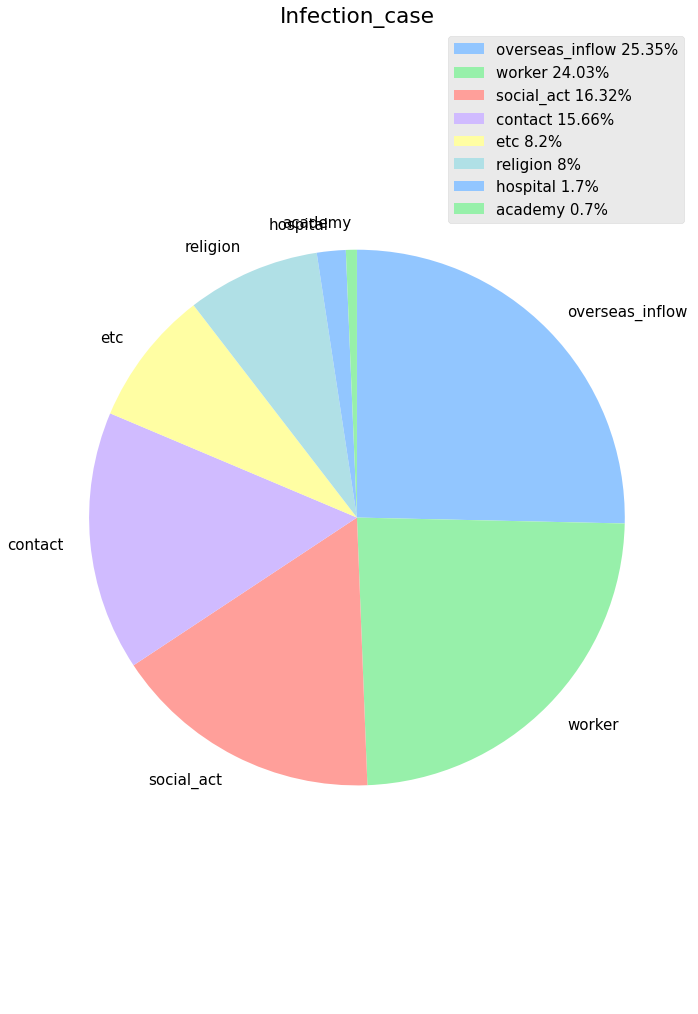

In [114]:
plt.figure(figsize=(12,18))
plt.style.use(['seaborn-pastel'])
plt.rc('font', size=15)
plt.axis('equal') # 타원 -> 원형으로 바꿔줌
plt.pie(ctg_dict.values(),
        labels=ctg_dict.keys(),
        startangle=90,
        counterclock=False)
plt.title('Infection_case')
plt.legend(ctg_pct_dict.keys())
# plt.legend(ctg_dict.keys())
plt.savefig('infection_01.jpg')
plt.show()
# print(autopct='%.2f%%')

https://zephyrus1111.tistory.com/36  
겹치는 문제 해결 할 수 있을깤ㅋㅋㅋㅋ  

전체순위  
아 역시 해외유입이 1위  
직장 다니다가 걸린게 2위  
확진자 접촉이 3위  


# 3) 여자와 남자 감염 경로 분리하기

### 여자는 어쩌다가 코로나에 걸렸을까?

In [194]:
# for문 돌리려다가 실패, df는 어떻게 for문에 넣으나요?
# ctg = [overseas_inflow, contact, social_act, worker, religion, hospital, academy, etc]

# for i in range(len(ctg)):
    
#     df[i] = df[df['sex']=="female"]
    
#     return 
    
# df_female

ValueError: too many values to unpack (expected 2)

In [70]:
female_overseas_inflow = overseas_inflow[overseas_inflow['sex']=='female']
female_overseas_inflow

patient_id     sex  age country province             city  \
10   1000000011  female  50s   China    Seoul     Seodaemun-gu   
38   1000000039  female  70s   China    Seoul     Geumcheon-gu   
39   1000000040  female  60s   Korea    Seoul        Gwanak-gu   
42   1000000043  female  20s   Korea    Seoul        Songpa-gu   
84   1000000085  female  30s   Korea    Seoul       Gangnam-gu   
..          ...     ...  ...     ...      ...              ...   
554  1000000555  female  20s   Korea    Seoul      Seongbuk-gu   
555  1000000556  female  20s   Korea    Seoul       Yongsan-gu   
558  1000000559  female  20s   Korea    Seoul       Yongsan-gu   
560  1000000561  female  30s   Korea    Seoul  Yeongdeungpo-gu   
561  1000000562  female  20s   Korea    Seoul      Gangdong-gu   

      infection_case infected_by contact_number symptom_onset_date  \
10   overseas inflow         NaN             23                NaN   
38   overseas inflow         NaN            NaN                NaN   
39   overseas inflow  1500000002            NaN                NaN   
42   overseas inflow         NaN            NaN                NaN   
84   overseas inflow         NaN            NaN                NaN   
..               ...         ...            ...                ...   
554  overseas inflow         NaN            NaN                NaN   
555  overseas inflow         NaN            NaN                NaN   
558  overseas inflow         NaN            NaN                NaN   
560  overseas inflow         NaN            NaN                NaN   
561  overseas inflow         NaN            NaN                NaN   

    confirmed_date released_date deceased_date     state  
10      2020-02-06    2020-02-29           NaN  released  
38      2020-02-25           NaN           NaN  released  
39      2020-02-25           NaN           NaN  released  
42      2020-02-26           NaN           NaN  released  
84      2020-02-27    2020-03-17           NaN  released  
..             ...           ...           ...       ...  
554     2020-04-05           NaN           NaN  released  
555     2020-04-05           NaN           NaN  released  
558     2020-04-05           NaN           NaN  released  
560     2020-04-05           NaN           NaN  released  
561     2020-04-05           NaN           NaN  released  

[108 rows x 14 columns]

In [71]:
female_contact = contact[contact['sex']=='female']
female_contact

patient_id     sex  age country province         city  \
1    1000000005  female  20s   Korea    Seoul  Seongbuk-gu   
2    1000000006  female  50s   Korea    Seoul    Jongno-gu   
4    1000000010  female  60s   Korea    Seoul  Seongbuk-gu   
6    1000000014  female  60s   Korea    Seoul    Jongno-gu   
9    1000000019  female  70s   Korea    Seoul    Jongno-gu   
..          ...     ...  ...     ...      ...          ...   
173  1000000070  female  40s   Korea    Seoul     Nowon-gu   
175  1000000079  female  10s   Korea    Seoul     Nowon-gu   
181  1000000094  female  50s   Korea    Seoul  Seongbuk-gu   
182  1000000095  female  20s   Korea    Seoul  Seongbuk-gu   
183  1000000102  female  40s   Korea    Seoul   Yongsan-gu   

           infection_case infected_by contact_number symptom_onset_date  \
1    contact with patient  1000000002              2                NaN   
2    contact with patient  1000000003             43                NaN   
4    contact with patient  1000000003              6                NaN   
6    contact with patient  1000000013             27         2020-02-06   
9    contact with patient  1000000021            NaN                NaN   
..                    ...         ...            ...                ...   
173      Seongdong-gu APT         NaN            NaN                NaN   
175      Seongdong-gu APT         NaN            NaN         2020-02-20   
181      Seongdong-gu APT         NaN            NaN                NaN   
182      Seongdong-gu APT         NaN            NaN                NaN   
183      Seongdong-gu APT         NaN            NaN                NaN   

    confirmed_date released_date deceased_date     state  
1       2020-01-31    2020-02-24           NaN  released  
2       2020-01-31    2020-02-19           NaN  released  
4       2020-02-05    2020-02-29           NaN  released  
6       2020-02-16    2020-03-12           NaN  released  
9       2020-02-20    2020-03-08           NaN  released  
..             ...           ...           ...       ...  
173     2020-02-27           NaN           NaN  released  
175     2020-02-28           NaN           NaN  released  
181     2020-03-02           NaN           NaN  released  
182     2020-03-02    2020-03-20           NaN  released  
183     2020-03-04           NaN           NaN  released  

[67 rows x 14 columns]

In [72]:
female_social_act = social_act[social_act['sex']=='female']
female_social_act

patient_id     sex  age country province          city infection_case  \
115  1000000781  female  50s   Korea    Seoul  Seongdong-gu  Itaewon Clubs   

    infected_by contact_number symptom_onset_date confirmed_date  \
115  1000000770            NaN                NaN     2020-05-25   

    released_date deceased_date     state  
115           NaN           NaN  released

In [73]:
female_worker = worker[worker['sex']=='female']
female_worker

patient_id     sex  age country province          city  \
115  1000001290  female  70s   Korea    Seoul       Mapo-gu   
119  1000000125  female  50s   Korea    Seoul      Nowon-gu   
120  1000000131  female  50s   Korea    Seoul  Eunpyeong-gu   
122  1000000136  female  50s   Korea    Seoul       Jung-gu   
123  1000000137  female  50s   Korea    Seoul  Geumcheon-gu   
..          ...     ...  ...     ...      ...           ...   
209  1000000296  female  50s   Korea    Seoul    Dongjak-gu   
210  1000000300  female  40s   Korea    Seoul       Guro-gu   
211  1000000315  female  50s   Korea    Seoul     Gwanak-gu   
212  1000000328  female  50s   Korea    Seoul  Seodaemun-gu   
213  1000000329  female  40s   Korea    Seoul  Seodaemun-gu   

          infection_case infected_by contact_number symptom_onset_date  \
115              Richway         NaN            NaN                NaN   
119  Guro-gu Call Center         NaN            NaN                NaN   
120  Guro-gu Call Center         NaN            NaN         2020-03-07   
122  Guro-gu Call Center         NaN            NaN                NaN   
123  Guro-gu Call Center         NaN            NaN                NaN   
..                   ...         ...            ...                ...   
209  Guro-gu Call Center         NaN            NaN                NaN   
210  Guro-gu Call Center         NaN            NaN                NaN   
211  Guro-gu Call Center         NaN            NaN                NaN   
212  Guro-gu Call Center  1000000214            NaN                NaN   
213  Guro-gu Call Center  1000000214            NaN                NaN   

    confirmed_date released_date deceased_date     state  
115     2020-06-27           NaN           NaN  isolated  
119     2020-03-08           NaN           NaN  released  
120     2020-03-09           NaN           NaN  released  
122     2020-03-09           NaN           NaN  released  
123     2020-03-09           NaN           NaN  released  
..             ...           ...           ...       ...  
209     2020-03-19           NaN           NaN  released  
210     2020-03-20           NaN           NaN  released  
211     2020-03-20           NaN           NaN  released  
212     2020-03-22           NaN           NaN  released  
213     2020-03-22           NaN           NaN  released  

[69 rows x 14 columns]

In [74]:
female_religion = religion[religion['sex']=='female']
female_religion

patient_id     sex  age country province           city  \
0   1000000864  female  60s   Korea    Seoul     Gangseo-gu   
3   1000000869  female  50s   Korea    Seoul   Yangcheon-gu   
8   1000000878  female  60s   Korea    Seoul            etc   
62  1000000122  female  20s   Korea    Seoul  Dongdaemun-gu   
65  1000000212  female  20s   Korea    Seoul  Dongdaemun-gu   
68  1000000238  female  70s   Korea    Seoul  Dongdaemun-gu   
71  1000000241  female  60s   Korea    Seoul    Jungnang-gu   
72  1000000244  female  60s   Korea    Seoul      Dobong-gu   
76  1000000274  female  50s   Korea    Seoul    Seongbuk-gu   
91  1000000231  female  50s   Korea    Seoul      Seocho-gu   

                      infection_case infected_by contact_number  \
0   SMR Newly Planted Churches Group         NaN            NaN   
3   SMR Newly Planted Churches Group         NaN            NaN   
8   SMR Newly Planted Churches Group  1000000864            NaN   
62                     Dongan Church         NaN            NaN   
65                     Dongan Church         NaN            NaN   
68                     Dongan Church         NaN            NaN   
71                     Dongan Church         NaN            NaN   
72                     Dongan Church         NaN            NaN   
76                     Dongan Church         NaN            NaN   
91                Shincheonji Church         NaN            NaN   

   symptom_onset_date confirmed_date released_date deceased_date     state  
0                 NaN     2020-06-01           NaN           NaN  released  
3                 NaN     2020-06-01           NaN           NaN  released  
8                 NaN     2020-06-02           NaN           NaN  isolated  
62         2020-02-28     2020-03-08           NaN           NaN  released  
65                NaN     2020-03-11           NaN           NaN  released  
68                NaN     2020-03-13           NaN           NaN  released  
71                NaN     2020-03-14           NaN           NaN  released  
72                NaN     2020-03-14           NaN           NaN  released  
76                NaN     2020-03-18           NaN           NaN  released  
91                NaN     2020-03-12           NaN           NaN  released

In [75]:
female_hospital = hospital[hospital['sex']=='female']
female_hospital

patient_id     sex  age country province          city  \
2   1000000028  female  70s   Korea    Seoul     Jongno-gu   
3   1000000029  female  20s   Korea    Seoul     Jongno-gu   
5   1000000036  female  50s   Korea    Seoul  Eunpyeong-gu   
7   1000000053  female  40s   Korea    Seoul  Eunpyeong-gu   
8   1000000054  female  80s   Korea    Seoul  Eunpyeong-gu   
9   1000000055  female  20s   Korea    Seoul  Yangcheon-gu   
10  1000000057  female  70s   Korea    Seoul           etc   
11  1000000059  female  60s   Korea    Seoul  Eunpyeong-gu   

                   infection_case infected_by contact_number  \
2   Eunpyeong St. Mary's Hospital         NaN            NaN   
3   Eunpyeong St. Mary's Hospital  1000000028            NaN   
5   Eunpyeong St. Mary's Hospital         NaN            NaN   
7   Eunpyeong St. Mary's Hospital  1000000054            NaN   
8   Eunpyeong St. Mary's Hospital         NaN            NaN   
9   Eunpyeong St. Mary's Hospital         NaN            NaN   
10  Eunpyeong St. Mary's Hospital         NaN            NaN   
11  Eunpyeong St. Mary's Hospital  1000000060            NaN   

   symptom_onset_date confirmed_date released_date deceased_date     state  
2                 NaN     2020-02-23    2020-03-11           NaN  released  
3          2020-02-11     2020-02-26    2020-03-11           NaN  released  
5                 NaN     2020-02-25           NaN           NaN  released  
7          2020-02-25     2020-02-27    2020-03-17           NaN  released  
8                 NaN     2020-02-27           NaN           NaN  released  
9                 NaN     2020-02-27    2020-03-03           NaN  released  
10                NaN     2020-02-27           NaN           NaN  released  
11                NaN     2020-02-28           NaN           NaN  released

In [76]:
female_academy = academy[academy['sex']=='female']
female_academy

Empty DataFrame
Columns: [patient_id, sex, age, country, province, city, infection_case, infected_by, contact_number, symptom_onset_date, confirmed_date, released_date, deceased_date, state]
Index: []

In [77]:
female_etc = etc[etc['sex']=='female']
female_etc

patient_id     sex  age country province           city infection_case  \
47   1000000048  female  20s   Korea    Seoul   Eunpyeong-gu            etc   
50   1000000051  female  20s   Korea    Seoul      Songpa-gu            etc   
57   1000000058  female  30s   Korea    Seoul     Gangnam-gu            etc   
67   1000000068  female  20s   Korea    Seoul     Gangnam-gu            etc   
70   1000000071  female  30s   Korea    Seoul       Nowon-gu            etc   
71   1000000072  female  40s   Korea    Seoul    Gangdong-gu            etc   
76   1000000077  female  20s   Korea    Seoul   Seongdong-gu            etc   
85   1000000086  female  30s   Korea    Seoul     Gangnam-gu            etc   
92   1000000093  female  50s   Korea    Seoul     Gangnam-gu            etc   
98   1000000099  female  20s   Korea    Seoul  Dongdaemun-gu            etc   
103  1000000104  female  10s   Korea    Seoul     Gangbuk-gu            etc   
122  1000000123  female  70s   Korea    Seoul            etc            etc   
139  1000000140  female  40s   Korea    Seoul   Eunpyeong-gu            etc   
205  1000000206  female  20s   Korea    Seoul   Seodaemun-gu            etc   
206  1000000207  female  70s   Korea    Seoul   Eunpyeong-gu            etc   
214  1000000215  female  60s   Korea    Seoul      Songpa-gu            etc   
233  1000000234  female  20s   Korea    Seoul      Seocho-gu            etc   
254  1000000255  female  30s   Korea    Seoul   Seodaemun-gu            etc   
266  1000000267  female  50s   Korea    Seoul     Dongjak-gu            etc   
282  1000000283  female  70s   Korea    Seoul      Gwanak-gu            etc   
323  1000000324  female  50s   Korea    Seoul      Seocho-gu            etc   
392  1000000393  female  40s   Korea    Seoul     Dongjak-gu            etc   
398  1000000399  female  40s   Korea    Seoul        Guro-gu            etc   
410  1000000411  female  50s   Korea    Seoul     Dongjak-gu            etc   
411  1000000412  female  40s   Korea    Seoul        Guro-gu            etc   
413  1000000414  female  20s   Korea    Seoul      Gwanak-gu            etc   
417  1000000418  female  50s   Korea    Seoul      Dobong-gu            etc   
428  1000000429  female  50s   Korea    Seoul   Geumcheon-gu            etc   
429  1000000430  female  50s   Korea    Seoul   Geumcheon-gu            etc   
430  1000000431  female  50s   Korea    Seoul   Geumcheon-gu            etc   
431  1000000432  female  40s   Korea    Seoul   Geumcheon-gu            etc   
432  1000000433  female  40s   Korea    Seoul     Dongjak-gu            etc   
434  1000000435  female  50s   Korea    Seoul      Gwanak-gu            etc   
436  1000000437  female  70s   Korea    Seoul      Gwanak-gu            etc   
437  1000000438  female  50s   Korea    Seoul      Gwanak-gu            etc   
438  1000000439  female  70s   Korea    Seoul      Gwanak-gu            etc   
448  1000000449  female  50s   Korea    Seoul        Guro-gu            etc   
450  1000000451  female  60s   Korea    Seoul     Dongjak-gu            etc   
452  1000000453  female  40s   Korea    Seoul            etc            etc   
456  1000000457  female  50s   Korea    Seoul        Guro-gu            etc   
461  1000000462  female  50s   Korea    Seoul     Dongjak-gu            etc   
475  1000000476  female  10s   Korea    Seoul            etc            etc   
487  1000000488  female  50s   Korea    Seoul   Yangcheon-gu            etc   
497  1000000498  female  50s   Korea    Seoul      Gwanak-gu            etc   
524  1000000525  female  40s   Korea    Seoul     Gangnam-gu            etc   
527  1000000528  female  60s   Korea    Seoul   Eunpyeong-gu            etc   
539  1000000540  female  50s   Korea    Seoul      Gwanak-gu            etc   

    infected_by contact_number symptom_onset_date confirmed_date  \
47          NaN            NaN                NaN     2020-02-26   
50          NaN            NaN                NaN     2020-02-27   
57      

In [78]:
# list 안에 있는 df 길이재서 list만들기
female_ctg = [female_overseas_inflow, female_contact, female_social_act, female_worker, female_religion, female_hospital, female_academy, female_etc]

female_num_confirm = []
for i in female_ctg:
    female_num_confirm.append(len(i))
    
print(type(female_num_confirm))
female_num_confirm

<class 'list'>


[108, 67, 1, 69, 10, 8, 0, 47]

In [79]:
# 카테고리 이름 만으로 list만들기 
ctg_list = ['overseas_inflow', 'contact', 'social_act', 'worker', 'religion', 'hospital', 'academy', 'etc']
ctg_list

['overseas_inflow',
 'contact',
 'social_act',
 'worker',
 'religion',
 'hospital',
 'academy',
 'etc']

In [80]:
# 카테고리 이름과 확진자수로 dict 만들기
female_ctg_dict = dict()

for i in range(len(ctg_list)) :
    female_ctg_dict[ctg_list[i]] = female_num_confirm[i]
    
female_ctg_dict

{'overseas_inflow': 108,
 'contact': 67,
 'social_act': 1,
 'worker': 69,
 'religion': 10,
 'hospital': 8,
 'academy': 0,
 'etc': 47}

In [81]:
# dictionary 확진자 수를 기준으로 정렬
# 참고 : sex_dict = dict(sorted(sex_dict.items(), key=lambda x: x[1], reverse=True))

female_ctg_dict = dict(sorted(female_ctg_dict.items(), key=lambda x :x[1], reverse=True))
female_ctg_dict

{'overseas_inflow': 108,
 'worker': 69,
 'contact': 67,
 'etc': 47,
 'religion': 10,
 'hospital': 8,
 'social_act': 1,
 'academy': 0}

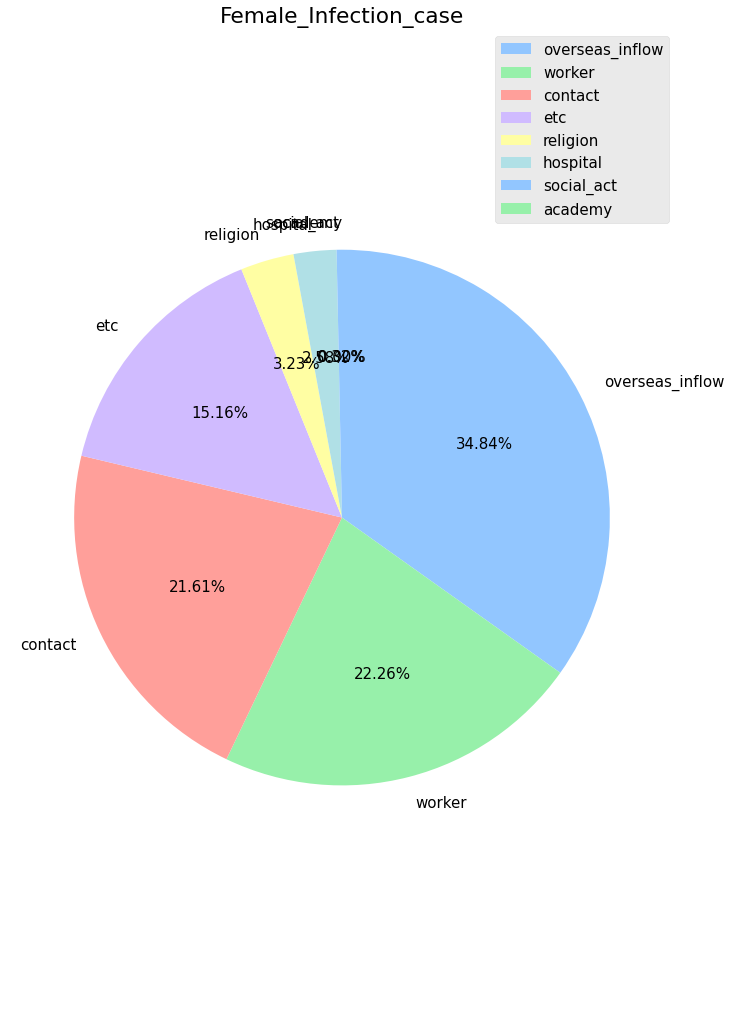

In [83]:
plt.figure(figsize=(12,18))
plt.style.use(['seaborn-pastel'])
plt.rc('font', size=15)
plt.axis('equal') # 타원 -> 원형으로 바꿔줌
plt.pie(female_ctg_dict.values(),
        autopct='%.2f%%',
        labels=female_ctg_dict.keys(),
        startangle=90,
        counterclock=False)
plt.title('Female_Infection_case')
plt.savefig('infection_female.jpg')
plt.legend(female_ctg_dict.keys())
plt.show()

1위는 당연히 해외 경로고
2위는 직장이구나, 일하다가 많이 걸렸군,,  


### 남자는 어쩌다가 코로나에 걸렸을까?

In [84]:
male_overseas_inflow = overseas_inflow[overseas_inflow['sex']=='male']
male_overseas_inflow

patient_id   sex  age country province          city   infection_case  \
0    1000000001  male  50s   Korea    Seoul    Gangseo-gu  overseas inflow   
1    1000000002  male  30s   Korea    Seoul   Jungnang-gu  overseas inflow   
3    1000000004  male  20s   Korea    Seoul       Mapo-gu  overseas inflow   
7    1000000008  male  20s   Korea    Seoul           etc  overseas inflow   
8    1000000009  male  30s   Korea    Seoul     Songpa-gu  overseas inflow   
..          ...   ...  ...     ...      ...           ...              ...   
547  1000000548  male  10s   Korea    Seoul    Gangnam-gu  overseas inflow   
548  1000000549  male  30s   Korea    Seoul    Gangnam-gu  overseas inflow   
556  1000000557  male  20s   Korea    Seoul    Gangseo-gu  overseas inflow   
562  1000000563  male  40s   Korea    Seoul           etc  overseas inflow   
862  1000000863  male  10s   Korea    Seoul  Yangcheon-gu  overseas inflow   

    infected_by contact_number symptom_onset_date confirmed_date  \
0           NaN             75         2020-01-22     2020-01-23   
1           NaN             31                NaN     2020-01-30   
3           NaN              9         2020-01-26     2020-01-30   
7           NaN              0                NaN     2020-02-02   
8           NaN             68                NaN     2020-02-05   
..          ...            ...                ...            ...   
547         NaN            NaN                NaN     2020-04-04   
548         NaN              1                NaN     2020-04-04   
556         NaN            NaN                NaN     2020-04-05   
562         NaN              2                NaN     2020-04-05   
862         NaN            NaN                NaN     2020-06-01   

    released_date deceased_date     state  
0      2020-02-05           NaN  released  
1      2020-03-02           NaN  released  
3      2020-02-15           NaN  released  
7      2020-02-24           NaN  released  
8      2020-02-21           NaN  released  
..            ...           ...       ...  
547           NaN           NaN  released  
548           NaN           NaN  released  
556           NaN           NaN  released  
562           NaN           NaN  released  
862           NaN           NaN  released  

[98 rows x 14 columns]

In [85]:
male_contact = contact[contact['sex']=='male']
male_contact

patient_id   sex  age country province             city  \
0    1000000003  male  50s   Korea    Seoul        Jongno-gu   
3    1000000007  male  20s   Korea    Seoul        Jongno-gu   
5    1000000013  male  80s   Korea    Seoul        Jongno-gu   
7    1000000016  male  70s   Korea    Seoul        Jongno-gu   
8    1000000017  male  70s   Korea    Seoul        Jongno-gu   
..          ...   ...  ...     ...      ...              ...   
176  1000000087  male  10s   Korea    Seoul         Nowon-gu   
177  1000000088  male  40s   Korea    Seoul      Gwangjin-gu   
178  1000000089  male  50s   Korea    Seoul      Seongbuk-gu   
179  1000000090  male  50s   Korea    Seoul  Yeongdeungpo-gu   
180  1000000092  male  20s   Korea    Seoul  Yeongdeungpo-gu   

           infection_case infected_by contact_number symptom_onset_date  \
0    contact with patient  2002000001             17                NaN   
3    contact with patient  1000000003              0                NaN   
5    contact with patient  1000000017            117                NaN   
7    contact with patient  1000000017            NaN                NaN   
8    contact with patient  1000000003            NaN                NaN   
..                    ...         ...            ...                ...   
176      Seongdong-gu APT         NaN            NaN         2020-02-24   
177      Seongdong-gu APT         NaN            NaN                NaN   
178      Seongdong-gu APT         NaN            NaN                NaN   
179      Seongdong-gu APT         NaN            NaN                NaN   
180      Seongdong-gu APT         NaN            NaN         2020-02-26   

    confirmed_date released_date deceased_date     state  
0       2020-01-30    2020-02-19           NaN  released  
3       2020-01-31    2020-02-10           NaN  released  
5       2020-02-16           NaN           NaN  deceased  
7       2020-02-19    2020-03-11           NaN  released  
8       2020-02-20    2020-03-01           NaN  released  
..             ...           ...           ...       ...  
176     2020-02-28           NaN           NaN  released  
177     2020-03-01           NaN           NaN  released  
178     2020-03-01           NaN           NaN  released  
179     2020-03-01           NaN           NaN  released  
180     2020-03-02           NaN           NaN  released  

[71 rows x 14 columns]

In [86]:
male_social_act = social_act[social_act['sex']=='male']
male_social_act

patient_id   sex  age country province          city infection_case  \
30   1000000670  male  40s   Korea    Seoul  Yangcheon-gu  Itaewon Clubs   
60   1000000700  male  30s   Korea    Seoul  Yangcheon-gu  Itaewon Clubs   
94   1000000738  male  20s   Korea    Seoul  Yangcheon-gu  Itaewon Clubs   
95   1000000739  male  20s   Korea    Seoul  Yangcheon-gu  Itaewon Clubs   
108  1000000770  male  60s   Korea    Seoul  Seongdong-gu  Itaewon Clubs   
113  1000000779  male  60s   Korea    Seoul  Seongdong-gu  Itaewon Clubs   
114  1000000780  male  70s   Korea    Seoul  Seongdong-gu  Itaewon Clubs   

    infected_by contact_number symptom_onset_date confirmed_date  \
30          NaN            NaN                NaN     2020-05-10   
60          NaN            NaN                NaN     2020-05-11   
94          NaN            NaN                NaN     2020-05-18   
95          NaN            NaN                NaN     2020-05-18   
108         NaN            NaN                NaN     2020-05-24   
113  1000000770            NaN                NaN     2020-05-25   
114  1000000770            NaN                NaN     2020-05-25   

    released_date deceased_date     state  
30            NaN           NaN  released  
60            NaN           NaN  isolated  
94            NaN           NaN  released  
95            NaN           NaN  released  
108           NaN           NaN  released  
113           NaN           NaN  released  
114           NaN           NaN  released

In [87]:
male_worker = worker[worker['sex']=='male']
male_worker

patient_id   sex  age country province             city  \
121  1000000132  male  50s   Korea    Seoul     Eunpyeong-gu   
124  1000000139  male  30s   Korea    Seoul     Yangcheon-gu   
127  1000000143  male  40s   Korea    Seoul     Yangcheon-gu   
129  1000000145  male  40s   Korea    Seoul          Guro-gu   
131  1000000147  male  20s   Korea    Seoul          Guro-gu   
132  1000000148  male  50s   Korea    Seoul          Guro-gu   
159  1000000177  male  40s   Korea    Seoul          Guro-gu   
160  1000000179  male  50s   Korea    Seoul          Guro-gu   
165  1000000184  male  30s   Korea    Seoul          Mapo-gu   
171  1000000193  male  20s   Korea    Seoul        Gwanak-gu   
172  1000000194  male  40s   Korea    Seoul        Gwanak-gu   
175  1000000197  male  60s   Korea    Seoul     Yangcheon-gu   
179  1000000201  male  30s   Korea    Seoul         Nowon-gu   
180  1000000202  male  60s   Korea    Seoul         Nowon-gu   
181  1000000203  male  20s   Korea    Seoul       Gangseo-gu   
182  1000000204  male  50s   Korea    Seoul       Gangseo-gu   
184  1000000208  male  40s   Korea    Seoul      Jungnang-gu   
185  1000000209  male  70s   Korea    Seoul          Guro-gu   
188  1000000218  male  40s   Korea    Seoul          Guro-gu   
191  1000000226  male  20s   Korea    Seoul     Geumcheon-gu   
193  1000000245  male  30s   Korea    Seoul  Yeongdeungpo-gu   
195  1000000251  male   0s   Korea    Seoul          Guro-gu   
196  1000000253  male  50s   Korea    Seoul          Guro-gu   
199  1000000257  male  30s   Korea    Seoul          Guro-gu   
203  1000000276  male   0s   Korea    Seoul     Yangcheon-gu   
204  1000000285  male  40s   Korea    Seoul          Mapo-gu   
206  1000000287  male  10s   Korea    Seoul          Mapo-gu   
265  1000000881  male  30s   Korea    Seoul       Gangseo-gu   
276  1000000895  male  60s   Korea    Seoul       Gangseo-gu   
283  1000001198  male  80s   Korea    Seoul  Yeongdeungpo-gu   

                            infection_case infected_by contact_number  \
121                    Guro-gu Call Center         NaN            NaN   
124                    Guro-gu Call Center         NaN            NaN   
127                    Guro-gu Call Center         NaN            NaN   
129                    Guro-gu Call Center         NaN            NaN   
131                    Guro-gu Call Center         NaN            NaN   
132                    Guro-gu Call Center         NaN            NaN   
159                    Guro-gu Call Center         NaN            NaN   
160                    Guro-gu Call Center         NaN            NaN   
165                    Guro-gu Call Center         NaN            NaN   
171                    Guro-gu Call Center         NaN            NaN   
172                    Guro-gu Call Center         NaN            NaN   
175                    Guro-gu Call Center         NaN            NaN   
179                    Guro-gu Call Center         NaN            NaN   
180                    Guro-gu Call Center         NaN            NaN   
181                    Guro-gu Call Center         NaN            NaN   
182                    Guro-gu Call Center         NaN            NaN   
184                    Guro-gu Call Center         NaN            NaN   
185                    Guro-gu Call Center         NaN            NaN   
188                    Guro-gu Call Center         NaN            NaN   
191                    Guro-gu Call Center         NaN            NaN   
193                    Guro-gu Call Center         NaN            NaN   
195                    Guro-gu Call Center         NaN            NaN   
196                    Guro-gu Call Center         NaN            NaN   
199                    Guro-gu Call Center         NaN            NaN   
203                    Guro-gu Call Center         NaN            NaN   
204                    Guro-gu Call Center         NaN            NaN   
206                    Guro-gu Call Center       

In [88]:
male_religion = religion[religion['sex']=='male']
male_religion

patient_id   sex  age country province           city  \
1   1000000865  male  50s   Korea    Seoul     Gangseo-gu   
7   1000000877  male  60s   Korea    Seoul     Gangseo-gu   
60  1000000100  male  30s   Korea    Seoul  Dongdaemun-gu   
61  1000000120  male  30s   Korea    Seoul    Seongbuk-gu   
63  1000000124  male  20s   Korea    Seoul  Dongdaemun-gu   
64  1000000211  male  20s   Korea    Seoul  Dongdaemun-gu   
66  1000000217  male  20s   Korea    Seoul    Seongbuk-gu   
67  1000000220  male  50s   Korea    Seoul  Dongdaemun-gu   
69  1000000239  male  20s   Korea    Seoul  Dongdaemun-gu   
70  1000000240  male  50s   Korea    Seoul  Dongdaemun-gu   
73  1000000258  male  20s   Korea    Seoul  Dongdaemun-gu   
74  1000000259  male  20s   Korea    Seoul  Dongdaemun-gu   
75  1000000268  male  10s   Korea    Seoul  Dongdaemun-gu   
89  1000000023  male  50s   Korea    Seoul      Seocho-gu   
90  1000000047  male  20s   Korea    Seoul     Gangnam-gu   
94  1000000754  male  30s   Korea    Seoul   Yangcheon-gu   

                      infection_case infected_by contact_number  \
1   SMR Newly Planted Churches Group         NaN            NaN   
7   SMR Newly Planted Churches Group         NaN            NaN   
60                     Dongan Church         NaN            NaN   
61                     Dongan Church         NaN            NaN   
63                     Dongan Church         NaN            NaN   
64                     Dongan Church         NaN            NaN   
66                     Dongan Church         NaN            NaN   
67                     Dongan Church         NaN            NaN   
69                     Dongan Church         NaN            NaN   
70                     Dongan Church         NaN            NaN   
73                     Dongan Church         NaN            NaN   
74                     Dongan Church         NaN            NaN   
75                     Dongan Church         NaN            NaN   
89                Shincheonji Church         NaN            NaN   
90                Shincheonji Church         NaN            NaN   
94   Biblical Language study meeting         NaN            NaN   

   symptom_onset_date confirmed_date released_date deceased_date     state  
1                 NaN     2020-06-01           NaN           NaN  isolated  
7                 NaN     2020-06-02           NaN           NaN  released  
60                NaN     2020-03-04           NaN           NaN  released  
61                NaN     2020-03-06           NaN           NaN  released  
63                NaN     2020-03-08           NaN           NaN  released  
64                NaN     2020-03-11           NaN           NaN  released  
66                NaN     2020-03-11           NaN           NaN  released  
67                NaN     2020-03-11           NaN           NaN  released  
69                NaN     2020-03-13           NaN           NaN  released  
70         2020-03-05     2020-03-13           NaN           NaN  released  
73                NaN     2020-03-16           NaN           NaN  released  
74                NaN     2020-03-16           NaN           NaN  released  
75                NaN     2020-03-17           NaN           NaN  released  
89                NaN     2020-02-21           NaN           NaN  released  
90                NaN     2020-02-26    2020-03-11           NaN  released  
94         2020-05-18     2020-05-20           NaN           NaN  released

In [89]:
male_hospital = hospital[hospital['sex']=='male']
male_hospital

patient_id   sex  age country province          city  \
0   1000000022  male  30s   Korea    Seoul  Seodaemun-gu   
1   1000000025  male  60s   Korea    Seoul   Gangdong-gu   
4   1000000030  male  60s   China    Seoul   Gangdong-gu   
6   1000000049  male  60s   Korea    Seoul  Eunpyeong-gu   
12  1000000060  male  80s   Korea    Seoul  Eunpyeong-gu   
13  1000000061  male  60s   Korea    Seoul  Seodaemun-gu   

                   infection_case infected_by contact_number  \
0   Eunpyeong St. Mary's Hospital         NaN            NaN   
1   Eunpyeong St. Mary's Hospital  1000000022            NaN   
4   Eunpyeong St. Mary's Hospital         NaN            NaN   
6   Eunpyeong St. Mary's Hospital         NaN            NaN   
12  Eunpyeong St. Mary's Hospital  1000000054            NaN   
13  Eunpyeong St. Mary's Hospital  1000000022            NaN   

   symptom_onset_date confirmed_date released_date deceased_date     state  
0                 NaN     2020-02-21           NaN           NaN  released  
1                 NaN     2020-02-22           NaN           NaN  released  
4                 NaN     2020-02-23           NaN           NaN  released  
6                 NaN     2020-02-26           NaN           NaN  released  
12         2020-02-23     2020-02-28           NaN           NaN  released  
13         2020-02-26     2020-02-28    2020-03-14           NaN  released

In [90]:
male_academy = academy[academy['sex']=='male']
male_academy

Empty DataFrame
Columns: [patient_id, sex, age, country, province, city, infection_case, infected_by, contact_number, symptom_onset_date, confirmed_date, released_date, deceased_date, state]
Index: []

In [91]:
male_etc = etc[etc['sex']=='male']
male_etc

patient_id   sex  age country province             city infection_case  \
17   1000000018  male  20s   Korea    Seoul              etc            etc   
25   1000000026  male  30s   Korea    Seoul        Seocho-gu            etc   
30   1000000031  male  50s   Korea    Seoul        Songpa-gu            etc   
34   1000000035  male  30s   Korea    Seoul              etc            etc   
37   1000000038  male  60s   Korea    Seoul              etc            etc   
40   1000000041  male  50s   Korea    Seoul      Gangdong-gu            etc   
41   1000000042  male  40s   Korea    Seoul         Nowon-gu            etc   
49   1000000050  male  20s   Korea    Seoul        Gwanak-gu            etc   
55   1000000056  male  50s   Korea    Seoul              etc            etc   
61   1000000062  male  40s   Korea    Seoul     Seodaemun-gu            etc   
62   1000000063  male  30s   Korea    Seoul        Gwanak-gu            etc   
65   1000000066  male  30s   Korea    Seoul       Gangnam-gu            etc   
68   1000000069  male  40s   Korea    Seoul         Nowon-gu            etc   
72   1000000073  male  40s   Korea    Seoul              etc            etc   
73   1000000074  male  50s   Korea    Seoul        Seocho-gu            etc   
90   1000000091  male  40s   Korea    Seoul  Yeongdeungpo-gu            etc   
95   1000000096  male  30s   Korea    Seoul        Dobong-gu            etc   
97   1000000098  male  50s   Korea    Seoul        Seocho-gu            etc   
104  1000000105  male  30s   Korea    Seoul       Gangnam-gu            etc   
134  1000000135  male  30s   Korea    Seoul     Eunpyeong-gu            etc   
137  1000000138  male  30s   Korea    Seoul              etc            etc   
209  1000000210  male  50s   Korea    Seoul     Eunpyeong-gu            etc   
226  1000000227  male  30s   Korea    Seoul     Geumcheon-gu            etc   
245  1000000246  male  50s   Korea    Seoul  Yeongdeungpo-gu            etc   
251  1000000252  male  30s   Korea    Seoul       Gangseo-gu            etc   
259  1000000260  male  30s   Korea    Seoul     Seodaemun-gu            etc   
260  1000000261  male  40s   Korea    Seoul        Gwanak-gu            etc   
264  1000000265  male  30s   Korea    Seoul        Gwanak-gu            etc   
278  1000000279  male  90s   Korea    Seoul       Yongsan-gu            etc   
279  1000000280  male  40s   Korea    Seoul       Gangnam-gu            etc   
300  1000000301  male  30s   Korea    Seoul       Dongjak-gu            etc   
311  1000000312  male  50s   Korea    Seoul      Gangdong-gu            etc   
315  1000000316  male  20s   Korea    Seoul         Nowon-gu            etc   
330  1000000331  male  70s   Korea    Seoul  Yeongdeungpo-gu            etc   
352  1000000353  male  40s   Korea    Seoul     Geumcheon-gu            etc   
371  1000000372  male  50s   Korea    Seoul              etc            etc   
391  1000000392  male  40s   Korea    Seoul          Guro-gu            etc   
426  1000000427  male  50s   Korea    Seoul     Geumcheon-gu            etc   
427  1000000428  male  80s   Korea    Seoul          Guro-gu            etc   
433  1000000434  male  40s   Korea    Seoul              etc            etc   
439  1000000440  male  50s   Korea    Seoul       Dongjak-gu            etc   
443  1000000444  male  50s   Korea    Seoul          Guro-gu            etc   
528  1000000529  male  40s   Korea    Seoul          Guro-gu            etc   
551  1000000552  male  30s   Korea    Seoul  Yeongdeungpo-gu            etc   

    infected_by contact_number symptom_onset_date confirmed_date  \
17          NaN            NaN                NaN     2020-02-20   
25          NaN            NaN         2020-02-21     2020-02-22   
30          NaN            NaN                NaN     2020-02-22   
34          NaN            NaN         2020-02-19     2020-02-25   
37          NaN            NaN         2020-02-24     2020-02-25   
40          NaN            NaN           

In [92]:
# list 안에 있는 df 길이재서 list만들기
male_ctg = [male_overseas_inflow, male_contact, male_social_act, male_worker, male_religion, male_hospital, male_academy, male_etc]

male_num_confirm = []
for i in male_ctg:
    male_num_confirm.append(len(i))
    
print(type(male_num_confirm))
male_num_confirm

<class 'list'>


[98, 71, 7, 30, 16, 6, 0, 44]

In [93]:
# 카테고리 이름 만으로 list만들기 
ctg_list = ['overseas_inflow', 'contact', 'social_act', 'worker', 'religion', 'hospital', 'academy', 'etc']
ctg_list

['overseas_inflow',
 'contact',
 'social_act',
 'worker',
 'religion',
 'hospital',
 'academy',
 'etc']

In [94]:
# 카테고리 이름과 확진자수로 dict 만들기
male_ctg_dict = dict()

for i in range(len(ctg_list)) :
    male_ctg_dict[ctg_list[i]] = male_num_confirm[i]
    
male_ctg_dict

{'overseas_inflow': 98,
 'contact': 71,
 'social_act': 7,
 'worker': 30,
 'religion': 16,
 'hospital': 6,
 'academy': 0,
 'etc': 44}

In [95]:
# dictionary 확진자 수를 기준으로 정렬
# 참고 : sex_dict = dict(sorted(sex_dict.items(), key=lambda x: x[1], reverse=True))

male_ctg_dict = dict(sorted(male_ctg_dict.items(), key=lambda x :x[1], reverse=True))
male_ctg_dict

{'overseas_inflow': 98,
 'contact': 71,
 'etc': 44,
 'worker': 30,
 'religion': 16,
 'social_act': 7,
 'hospital': 6,
 'academy': 0}

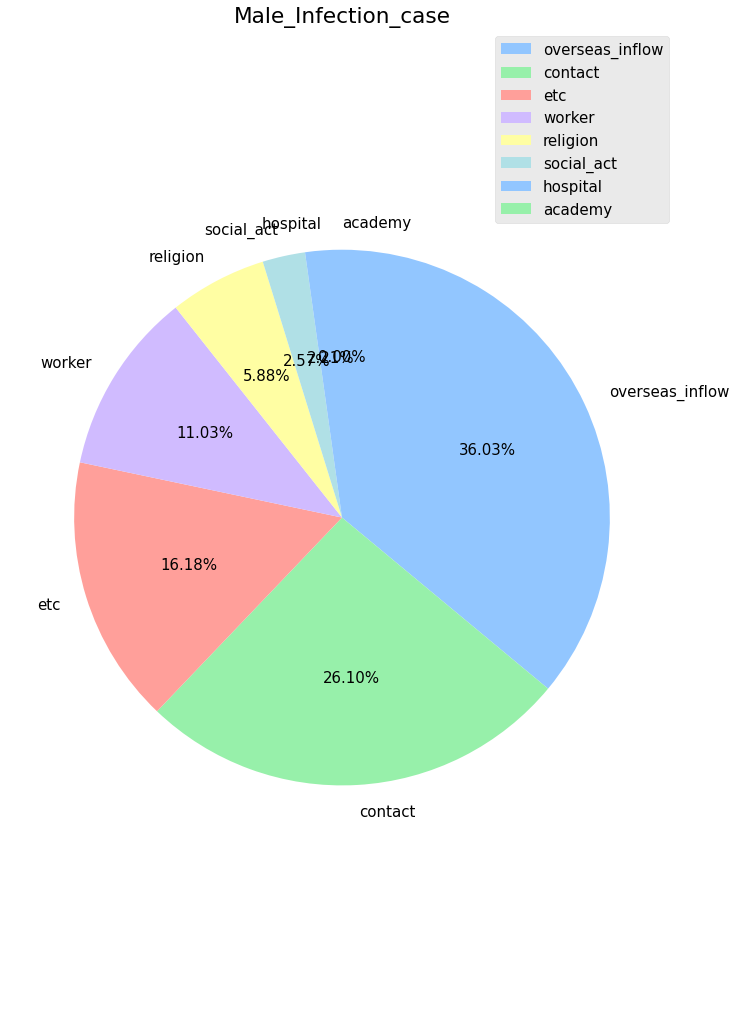

In [96]:
plt.figure(figsize=(12,18))
plt.style.use(['seaborn-pastel'])
plt.rc('font', size=15)
plt.axis('equal') # 타원 -> 원형으로 바꿔줌
plt.pie(male_ctg_dict.values(),
        autopct='%.2f%%',
        labels=male_ctg_dict.keys(),
        startangle=90,
        counterclock=False)
plt.title('Male_Infection_case')
plt.savefig('infection_male.jpg')
plt.legend(male_ctg_dict.keys())
plt.show()

여자, 남자 모두 감염 경로 1위는 해외 유입이다.

남자 2위는 여자랑 다르게 일반인과의 접촉이다.  

# 끝

~~인유 추측 : 서울 남자 유동인구 많은 곳이 확진자가 많지 않을까?(자치구)~~


In [238]:
male_ctg_dict

{'overseas_inflow': 98,
 'contact': 71,
 'etc': 44,
 'worker': 30,
 'religion': 16,
 'social_act': 7,
 'hospital': 6,
 'academy': 0}

In [239]:
female_ctg_dict

{'overseas_inflow': 108,
 'worker': 69,
 'contact': 67,
 'etc': 47,
 'religion': 10,
 'hospital': 8,
 'social_act': 1,
 'academy': 0}

# -----------------------------------

In [10]:
other = list(infection_dict.keys())[5:]
other_sum = 0

for key in other:
    other_sum = other_sum + infection_dict.pop(key)
    
infection_dict['other'] = other_sum
infection_dict

{'overseas inflow': 306,
 'contact with patient': 171,
 'Itaewon Clubs': 139,
 'Richway': 119,
 'etc': 99,
 'other': 393}

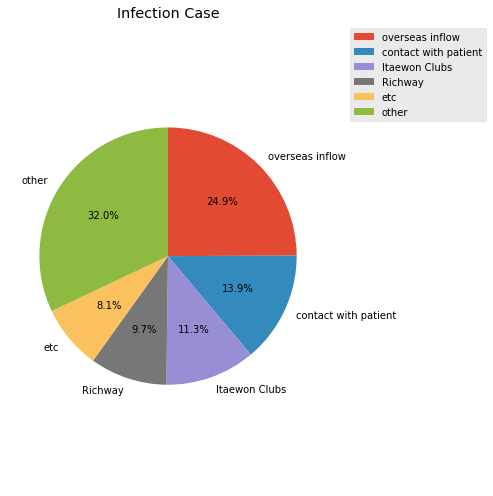

In [11]:
plt.figure(figsize=(7,7))
plt.axis('equal')
plt.pie(infection_dict.values(), 
        labels=infection_dict.keys(), 
        autopct='%.1f%%',
        startangle=90, 
        counterclock=False)
plt.title("Infection Case")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

### 왜 해외 유입으로 전염이 많이 되었을까?

- 입국자 수랑 연관이 있는지 확인하기

- 입국과 관련되 정책 확인하기

# 2. Region.csv

In [12]:
region = pd.read_csv(data_path + "Region.csv")

region_seoul = region[region['province'] == 'Seoul']

print("전국 데이터 개수 :", len(region))
print("서울 데이터 개수 :", len(region_seoul))

region_seoul.head(5)

전국 데이터 개수 : 244
서울 데이터 개수 : 26


code province         city   latitude   longitude  \
0  10000    Seoul        Seoul  37.566953  126.977977   
1  10010    Seoul   Gangnam-gu  37.518421  127.047222   
2  10020    Seoul  Gangdong-gu  37.530492  127.123837   
3  10030    Seoul   Gangbuk-gu  37.639938  127.025508   
4  10040    Seoul   Gangseo-gu  37.551166  126.849506   

   elementary_school_count  kindergarten_count  university_count  \
0                      607                 830                48   
1                       33                  38                 0   
2                       27                  32                 0   
3                       14                  21                 0   
4                       36                  56                 1   

   academy_ratio  elderly_population_ratio  elderly_alone_ratio  \
0           1.44                     15.38                  5.8   
1           4.18                     13.17                  4.3   
2           1.54                     14.55                  5.4   
3           0.67                     19.49                  8.5   
4           1.17                     14.39                  5.7   

   nursing_home_count  
0               22739  
1                3088  
2                1023  
3                 628  
4                1080

## 1) 요양원이 많은 자치구가 확진자도 많을까?

- 요양원이 많은 자치구

In [13]:
confirmed_seoul_city = pd.DataFrame(patientInfo_seoul['city'].value_counts(ascending=True)).reset_index()
confirmed_seoul_city.columns = ['city', 'confirmed']
confirmed_seoul_city['confirmed'] = round(confirmed_seoul_city['confirmed'].div(confirmed_seoul_city['confirmed'].sum())*100, 2)
confirmed_seoul_city

city  confirmed
0           Jung-gu       0.91
1       Gwangjin-gu       1.30
2         Jongno-gu       1.68
3        Gangbuk-gu       1.83
4      Geumcheon-gu       2.44
5       Jungnang-gu       2.52
6       Seongbuk-gu       2.52
7       Gangdong-gu       2.67
8      Seodaemun-gu       2.74
9     Dongdaemun-gu       2.90
10          Mapo-gu       2.90
11         Nowon-gu       3.28
12     Seongdong-gu       3.73
13       Yongsan-gu       3.81
14       Dongjak-gu       4.04
15     Eunpyeong-gu       4.04
16        Seocho-gu       4.19
17        Songpa-gu       4.19
18        Dobong-gu       4.73
19  Yeongdeungpo-gu       4.73
20     Yangcheon-gu       5.41
21       Gangseo-gu       5.95
22              etc       6.10
23       Gangnam-gu       6.33
24          Guro-gu       6.48
25        Gwanak-gu       8.61

In [14]:
region_seoul_nursing = region_seoul[['city', 'nursing_home_count']]
region_seoul_nursing = region_seoul_nursing.drop([0]).reset_index(drop=True)    # 서울 제거
region_seoul_nursing['nursing_home_count'] = round(region_seoul_nursing['nursing_home_count'].div(region_seoul_nursing['nursing_home_count'].sum())*100, 2)
region_seoul_nursing

city  nursing_home_count
0        Gangnam-gu               13.58
1       Gangdong-gu                4.50
2        Gangbuk-gu                2.76
3        Gangseo-gu                4.75
4         Gwanak-gu                4.00
5       Gwangjin-gu                3.18
6           Guro-gu                3.26
7      Geumcheon-gu                2.09
8          Nowon-gu                4.19
9         Dobong-gu                2.13
10    Dongdaemun-gu                3.66
11       Dongjak-gu                3.35
12          Mapo-gu                4.09
13     Seodaemun-gu                2.58
14        Seocho-gu                6.44
15     Seongdong-gu                2.61
16      Seongbuk-gu                3.21
17        Songpa-gu                6.72
18     Yangcheon-gu                3.59
19  Yeongdeungpo-gu                4.40
20       Yongsan-gu                1.91
21     Eunpyeong-gu                3.84
22        Jongno-gu                2.94
23          Jung-gu                3.20
24      Jungnang-gu                3.03

In [15]:
set(confirmed_seoul_city['city']) - set(region_seoul_nursing['city'])

{'etc'}

In [16]:
confirmed_seoul_city = confirmed_seoul_city.drop([22]).reset_index(drop=True)
print(len(confirmed_seoul_city), len(region_seoul_nursing))

25 25


In [17]:
temp = pd.merge(confirmed_seoul_city, region_seoul_nursing)
temp

city  confirmed  nursing_home_count
0           Jung-gu       0.91                3.20
1       Gwangjin-gu       1.30                3.18
2         Jongno-gu       1.68                2.94
3        Gangbuk-gu       1.83                2.76
4      Geumcheon-gu       2.44                2.09
5       Jungnang-gu       2.52                3.03
6       Seongbuk-gu       2.52                3.21
7       Gangdong-gu       2.67                4.50
8      Seodaemun-gu       2.74                2.58
9     Dongdaemun-gu       2.90                3.66
10          Mapo-gu       2.90                4.09
11         Nowon-gu       3.28                4.19
12     Seongdong-gu       3.73                2.61
13       Yongsan-gu       3.81                1.91
14       Dongjak-gu       4.04                3.35
15     Eunpyeong-gu       4.04                3.84
16        Seocho-gu       4.19                6.44
17        Songpa-gu       4.19                6.72
18        Dobong-gu       4.73                2.13
19  Yeongdeungpo-gu       4.73                4.40
20     Yangcheon-gu       5.41                3.59
21       Gangseo-gu       5.95                4.75
22       Gangnam-gu       6.33               13.58
23          Guro-gu       6.48                3.26
24        Gwanak-gu       8.61                4.00

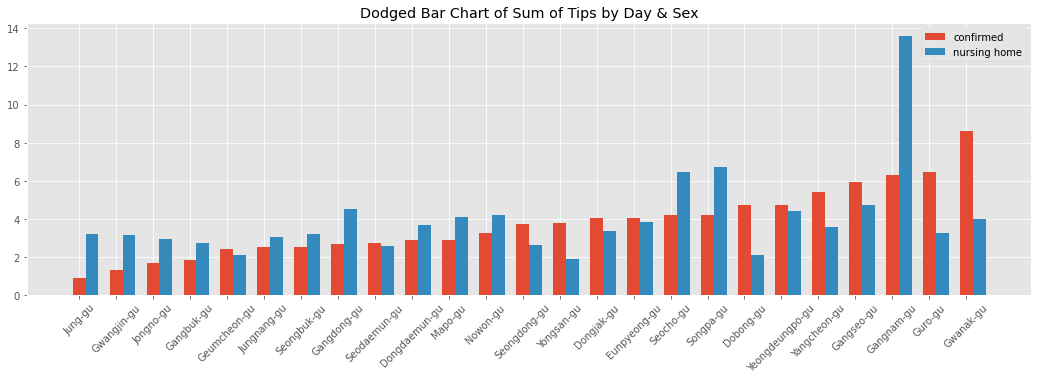

In [18]:
bar_width = 0.35
N = len(temp['city'].unique())
index = np.arange(N)

plt.figure(figsize=(18,5))

p1 = plt.bar(index, 
             temp['confirmed'], 
             bar_width, 
             label='confirmed')

p2 = plt.bar(index + bar_width,
             temp['nursing_home_count'], 
             bar_width, 
             label='nursing home')

plt.title('Dodged Bar Chart of Sum of Tips by Day & Sex')
plt.xticks(index, temp['city'], rotation=45)
plt.legend((p1[0], p2[0]), ('confirmed', 'nursing home'))
plt.show()

## 2) 노인 비율이 많은 자치구가 확진자도 많을까?

In [19]:
region_seoul_elderly = region_seoul[['city', 'elderly_population_ratio']]
region_seoul_elderly = region_seoul_elderly.drop([0]).reset_index(drop=True)    # 서울 제거
region_seoul_elderly['elderly_population_ratio'] = round(region_seoul_elderly['elderly_population_ratio'].div(region_seoul_elderly['elderly_population_ratio'].sum())*100, 2)
region_seoul_elderly

city  elderly_population_ratio
0        Gangnam-gu                      3.34
1       Gangdong-gu                      3.69
2        Gangbuk-gu                      4.95
3        Gangseo-gu                      3.65
4         Gwanak-gu                      3.84
5       Gwangjin-gu                      3.49
6           Guro-gu                      4.12
7      Geumcheon-gu                      4.10
8          Nowon-gu                      3.91
9         Dobong-gu                      4.54
10    Dongdaemun-gu                      4.38
11       Dongjak-gu                      4.02
12          Mapo-gu                      3.57
13     Seodaemun-gu                      4.26
14        Seocho-gu                      3.40
15     Seongdong-gu                      3.75
16      Seongbuk-gu                      4.10
17        Songpa-gu                      3.33
18     Yangcheon-gu                      3.44
19  Yeongdeungpo-gu                      3.96
20       Yongsan-gu                      4.28
21     Eunpyeong-gu                      4.32
22        Jongno-gu                      4.64
23          Jung-gu                      4.68
24      Jungnang-gu                      4.23

In [20]:
temp = pd.merge(confirmed_seoul_city, region_seoul_elderly)
temp

city  confirmed  elderly_population_ratio
0           Jung-gu       0.91                      4.68
1       Gwangjin-gu       1.30                      3.49
2         Jongno-gu       1.68                      4.64
3        Gangbuk-gu       1.83                      4.95
4      Geumcheon-gu       2.44                      4.10
5       Jungnang-gu       2.52                      4.23
6       Seongbuk-gu       2.52                      4.10
7       Gangdong-gu       2.67                      3.69
8      Seodaemun-gu       2.74                      4.26
9     Dongdaemun-gu       2.90                      4.38
10          Mapo-gu       2.90                      3.57
11         Nowon-gu       3.28                      3.91
12     Seongdong-gu       3.73                      3.75
13       Yongsan-gu       3.81                      4.28
14       Dongjak-gu       4.04                      4.02
15     Eunpyeong-gu       4.04                      4.32
16        Seocho-gu       4.19                      3.40
17        Songpa-gu       4.19                      3.33
18        Dobong-gu       4.73                      4.54
19  Yeongdeungpo-gu       4.73                      3.96
20     Yangcheon-gu       5.41                      3.44
21       Gangseo-gu       5.95                      3.65
22       Gangnam-gu       6.33                      3.34
23          Guro-gu       6.48                      4.12
24        Gwanak-gu       8.61                      3.84

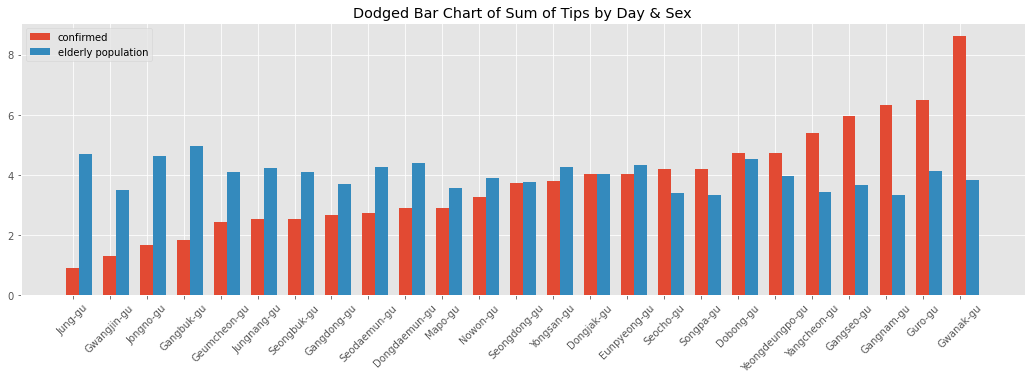

In [21]:
bar_width = 0.35
N = len(temp['city'].unique())
index = np.arange(N)

plt.figure(figsize=(18,5))

p1 = plt.bar(index, 
             temp['confirmed'], 
             bar_width, 
             label='confirmed')

p2 = plt.bar(index + bar_width,
             temp['elderly_population_ratio'], 
             bar_width, 
             label='elderly population')

plt.title('Dodged Bar Chart of Sum of Tips by Day & Sex')
plt.xticks(index, temp['city'], rotation=45)
plt.legend((p1[0], p2[0]), ('confirmed', 'elderly population'))
plt.show()

## 3) 학원이 많은 자치구가 확진자도 많을까?

In [22]:
region_seoul_academy = region_seoul[['city', 'academy_ratio']]
region_seoul_academy = region_seoul_academy.drop([0]).reset_index(drop=True)    # 서울 제거
region_seoul_academy['academy_ratio'] = round(region_seoul_academy['academy_ratio'].div(region_seoul_academy['academy_ratio'].sum())*100, 2)
region_seoul_academy

city  academy_ratio
0        Gangnam-gu          12.32
1       Gangdong-gu           4.54
2        Gangbuk-gu           1.98
3        Gangseo-gu           3.45
4         Gwanak-gu           2.62
5       Gwangjin-gu           3.42
6           Guro-gu           2.95
7      Geumcheon-gu           2.83
8          Nowon-gu           4.10
9         Dobong-gu           2.80
10    Dongdaemun-gu           3.12
11       Dongjak-gu           3.45
12          Mapo-gu           5.40
13     Seodaemun-gu           3.30
14        Seocho-gu           7.67
15     Seongdong-gu           2.86
16      Seongbuk-gu           3.01
17        Songpa-gu           4.86
18     Yangcheon-gu           6.66
19  Yeongdeungpo-gu           3.57
20       Yongsan-gu           2.00
21     Eunpyeong-gu           3.21
22        Jongno-gu           5.04
23          Jung-gu           2.77
24      Jungnang-gu           2.06

In [23]:
temp = pd.merge(confirmed_seoul_city, region_seoul_academy)
temp

city  confirmed  academy_ratio
0           Jung-gu       0.91           2.77
1       Gwangjin-gu       1.30           3.42
2         Jongno-gu       1.68           5.04
3        Gangbuk-gu       1.83           1.98
4      Geumcheon-gu       2.44           2.83
5       Jungnang-gu       2.52           2.06
6       Seongbuk-gu       2.52           3.01
7       Gangdong-gu       2.67           4.54
8      Seodaemun-gu       2.74           3.30
9     Dongdaemun-gu       2.90           3.12
10          Mapo-gu       2.90           5.40
11         Nowon-gu       3.28           4.10
12     Seongdong-gu       3.73           2.86
13       Yongsan-gu       3.81           2.00
14       Dongjak-gu       4.04           3.45
15     Eunpyeong-gu       4.04           3.21
16        Seocho-gu       4.19           7.67
17        Songpa-gu       4.19           4.86
18        Dobong-gu       4.73           2.80
19  Yeongdeungpo-gu       4.73           3.57
20     Yangcheon-gu       5.41           6.66
21       Gangseo-gu       5.95           3.45
22       Gangnam-gu       6.33          12.32
23          Guro-gu       6.48           2.95
24        Gwanak-gu       8.61           2.62

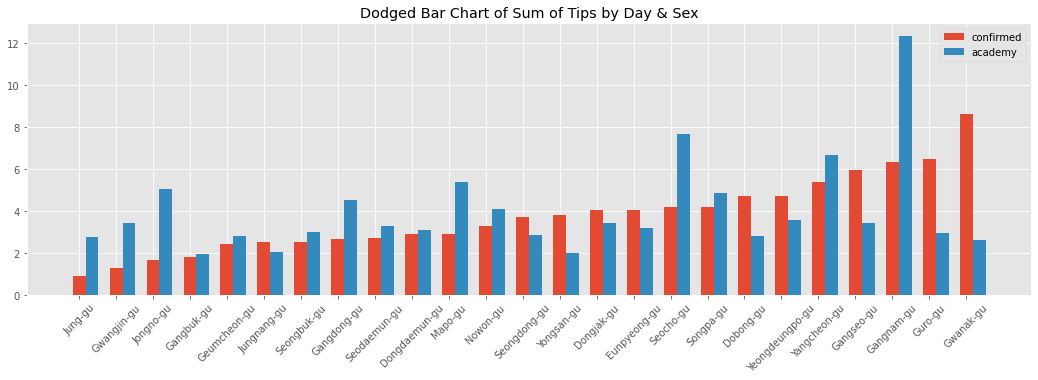

In [24]:
bar_width = 0.35
N = len(temp['city'].unique())
index = np.arange(N)

plt.figure(figsize=(18,5))

p1 = plt.bar(index, 
             temp['confirmed'], 
             bar_width, 
             label='confirmed')

p2 = plt.bar(index + bar_width,
             temp['academy_ratio'], 
             bar_width, 
             label='academy')

plt.title('Dodged Bar Chart of Sum of Tips by Day & Sex')
plt.xticks(index, temp['city'], rotation=45)
plt.legend((p1[0], p2[0]), ('confirmed', 'academy'))
plt.show()

# 3. Case.csv
next

# 4. SeoulFloating.csv

In [25]:
seoulFloating = pd.read_csv(data_path + "SeoulFloating.csv")

seoulFloating.head(5)

date  hour  birth_year     sex province           city  fp_num
0  2020-01-01     0          20  female    Seoul      Dobong-gu   19140
1  2020-01-01     0          20    male    Seoul      Dobong-gu   19950
2  2020-01-01     0          20  female    Seoul  Dongdaemun-gu   25450
3  2020-01-01     0          20    male    Seoul  Dongdaemun-gu   27050
4  2020-01-01     0          20  female    Seoul     Dongjag-gu   28880

## 1) 유동인구수가 많은 자치구가 확진자도 많을까?

# 5. Weather.csv

## 1) 월별 평균 기온과 월별 확진자 수 꺾은선 그래프로 비교

## 2) 월별 최대 풍속과 월별 확진자 수 비교

## 3) 월별 강수량과 월별 확진자 수 비교

# 6. searchTrend.csv
코로나 = 사스, 메르스, 코로나 (호흡기 감염증)  

코로나가 생기면서 다들 마스크쓰니까 감기, 등 다른 바이러스가 줄어듬. (https://pubmed.ncbi.nlm.nih.gov/27344959/)

# 7. Policy.csv

## 1) region 이랑 연관해서 보기
유딩 ~ 대딩까지는 policy때문에 많은 관련이 없을 것이라 생각해서 넘어갔다

## 2) 입국자수 감소의 원인과 정책 연관성
patientInfo.csv 에서 왜 해외유입으로 전염이 많이 되었을까? 연관성 보기

# 8. Time.csv

## 1) 코로나 검사가 많은날, 어떤 사건이 일어났을까?
누적데이터니까 알아서 잘 풀어서 계산하기

+) 코로나와 사망자수의 관계  
코로나와 결혼, 이혼의 관계  
코로나와 배달업체 수익구조 관계  
넷플릭스(주)와 코로나와의 관계 (국내 이용자수)  
문화,영화(Cgv, megabox, lotte) 산업과 코로나와의 관계  
코로나와 환경(미세먼지)와의 관계  